In [269]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
content_r = pd.read_csv('ContentRecommendationData.csv')
module_c = pd.read_csv('ModuleCountData.csv')
supplier_d = pd.read_csv('SupplierData.csv')

In [3]:
content_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7652996 entries, 0 to 7652995
Data columns (total 5 columns):
prsku                 object
clid                  int64
percentilerank        float64
biccontenttypename    object
hasbiccontenttype     int64
dtypes: float64(1), int64(2), object(2)
memory usage: 291.9+ MB


In [4]:
module_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196910 entries, 0 to 196909
Data columns (total 5 columns):
prsku          196910 non-null object
modulecount    196910 non-null int64
clid           196910 non-null int64
clname         196910 non-null object
mkcname        196910 non-null object
dtypes: int64(2), object(3)
memory usage: 7.5+ MB


In [5]:
supplier_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9358854 entries, 0 to 9358853
Data columns (total 20 columns):
prsku               object
soid                int64
soname              object
clid                int64
clname              object
mkcname             object
suid                int64
iswaymore           int64
addedtocart         int64
placedorder         int64
trafficcount        int64
iscurrent           int64
videocount          int64
grs1month           float64
grs2month           float64
grs3month           float64
grs12month          float64
weightedavgscore    float64
percentilerank      float64
expectedgrs         float64
dtypes: float64(7), int64(9), object(4)
memory usage: 1.4+ GB


In [6]:
supplier_d.size

187177080

In [7]:
content_r.size

38264980

In [8]:
module_c.size

984550

In [9]:
content_r.head()

,prsku,clid,percentilerank,biccontenttypename,hasbiccontenttype
0,AACF1003,15,NaN,Materials / How Its Made,0
1,AACF1020,15,NaN,Warranty & Guarantees,0
2,AACF1025,15,NaN,Materials / How Its Made,0
3,AACF1042,15,NaN,Relative Size & Fit,0
4,AACF1057,15,NaN,Materials / How Its Made,0


In [10]:
content_r.hasbiccontenttype.value_counts()

0    7343445
1     309551
Name: hasbiccontenttype, dtype: int64

In [11]:
array = content_r.percentilerank.value_counts()
print(array)

0.05    51096
0.02    51092
0.49    51092
0.50    51092
0.25    51092
        ...  
0.40    48036
0.15    47492
0.13    47364
1.00    25512
0.00    25244
Name: percentilerank, Length: 101, dtype: int64


In [12]:
module_c.head()

,prsku,modulecount,clid,clname,mkcname
0,AAOJ1497,1,34,Wall Art,Wall Art
1,ACFT1051,1,9,Bar Stools,Furniture - Kitchen and Dining
2,ACOT1466,1,34,Wall Art,Wall Art
3,ACOT4005,1,15,Area Rugs,Rugs
4,ACOT4710,4,15,Area Rugs,Rugs


In [13]:
module_c.modulecount.value_counts()

3     86884
1     35127
5     20147
2     18856
4     13383
      ...  
59        5
61        4
21        3
58        2
62        1
Name: modulecount, Length: 62, dtype: int64

In [14]:
content_r.clid.nunique()

48

In [15]:
module_c.clid.nunique()

48

In [16]:
supplier_d.groupby(['clid','prsku']).mean()

soid         suid  iswaymore  addedtocart  placedorder  \
clid prsku                                                                  
1    AAGE1000  4.250000   233.000000        1.0     0.500000     0.125000   
     AAGE1001  4.428571   200.428571        1.0     3.785714     0.000000   
     AAGE1002  4.300000   187.400000        1.0    20.000000     1.900000   
     AAGE1003  5.000000   233.000000        1.0     5.000000     0.166667   
     AAGE1004  5.000000   233.000000        1.0     1.166667     0.166667   
...                 ...          ...        ...          ...          ...   
48   ZGRS1015  3.500000     1.000000        0.0     0.000000     0.000000   
     ZGRS1016  3.500000     1.000000        0.0     1.000000     0.000000   
     ZGRS1017  2.666667  4320.333333        0.0     2.000000     0.666667   
     ZGRS1018  3.500000     1.000000        0.0     0.000000     0.000000   
     ZGRS1019  2.666667  4320.333333        0.0     2.666667     0.666667   

               trafficcount  iscurrent  videocount    grs1month    grs2month  \
clid prsku                                                                     
1    AAGE1000     87.250000        0.5         0.0   240.873825   818.267650   
     AAGE1001    182.071429        0.5         1.0   486.668886   973.337771   
     AAGE1002    529.600000        0.5         1.0  4925.153992  9347.062055   
     AAGE1003    272.333333        0.5         0.0   728.222872  1107.199539   
     AAGE1004     38.000000        0.5         0.0   328.924377   657.848754   
...                     ...        ...         ...          ...          ...   
48   ZGRS1015     18.500000        1.0         0.0     0.000000     0.000000   
     ZGRS1016     33.000000        1.0         0.0     0.000000     0.000000   
     ZGRS1017     40.000000        1.0         0.0   422.393600   422.393600   
     ZGRS1018      6.500000        1.0         0.0     0.000000     0.000000   
     ZGRS1019     50.666667        1.0         0.0   422.387200   422.387200   

                  grs3month    grs12month  weightedavgscore  percentilerank  \
clid prsku                                                                    
1    AAGE1000   1395.661475   5154.870653               NaN             NaN   
     AAGE1001    973.337771   8577.478016               NaN             NaN   
     AAGE1002  12343.713510  30946.458299               NaN             NaN   
     AAGE1003   1865.152872   3392.804839               NaN             NaN   
     AAGE1004    657.848754   2995.027123               NaN             NaN   
...                     ...           ...               ...             ...   
48   ZGRS1015      0.000000      0.000000               NaN             NaN   
     ZGRS1016      0.000000      0.000000               NaN             NaN   
     ZGRS1017    422.393600    422.393600               NaN             NaN   
     ZGRS1018      0.000000      0.000000               NaN             NaN   
     ZGRS1019    422.387200    422.387200               NaN             NaN   

               expectedgrs  
clid prsku                  
1    AAGE1000          NaN  
     AAGE1001          NaN  
     AAGE1002          NaN  
     AAGE1003          NaN  
     AAGE1004          NaN  
...                    ...  
48   ZGRS1015          NaN  
     ZGRS1016          NaN  
     ZGRS1017          NaN  
     ZGRS1018          NaN  
     ZGRS1019          NaN  

[1942518 rows x 15 columns]

In [17]:
supplier_d.head()

,prsku,soid,soname,clid,clname,mkcname,suid,iswaymore,addedtocart,placedorder,trafficcount,iscurrent,videocount,grs1month,grs2month,grs3month,grs12month,weightedavgscore,percentilerank,expectedgrs
0,AAAM1028,3,Wayfair UK,21,Cribs,Nursery,1,0,0,0,14,1,0,0.000000,0.00000,0.000000,0.000000,NaN,NaN,NaN
1,AABK1087,4,Wayfair DE,18,Mattress Toppers and Pads,Mattresses - Utility Bedding,7080,0,45,5,1362,1,0,265.558272,857.66493,3759.433838,6547.578930,NaN,NaN,NaN
2,AACE1000,6,Wayfair CA,15,Area Rugs,Rugs,1,0,0,0,0,1,0,0.000000,0.00000,0.000000,0.000000,NaN,NaN,NaN
3,AACF1003,3,Wayfair UK,15,Area Rugs,Rugs,4312,0,0,0,25,1,0,0.000000,0.00000,0.000000,342.437186,NaN,NaN,NaN
4,AACF1005,3,Wayfair UK,15,Area Rugs,Rugs,1,0,1,0,7,1,0,0.000000,0.00000,0.000000,0.000000,NaN,NaN,NaN


In [18]:
supplier_d.pivot_table('expectedgrs',index='clid',columns=['grs1month','grs2month','grs3month','grs12month'],aggfunc='sum')

grs1month  -107.790200    -103.390600    -64.566000     -59.502000      \
grs2month   -1.077902e+02  -1.033906e+02  -6.456600e+01  -5.950200e+01   
grs3month   -1.077902e+02  -1.033906e+02  -6.456600e+01  -5.950200e+01   
grs12month  -1.077902e+02  -1.033906e+02  -6.456600e+01  -5.950200e+01   
clid                                                                     
1                     NaN            NaN            NaN            NaN   
2                     NaN            NaN            NaN            NaN   
3                     NaN            NaN      24156.354      22261.738   
4                     NaN            NaN            NaN            NaN   
5                     NaN            NaN            NaN            NaN   
6                     NaN            NaN            NaN            NaN   
7                     NaN            NaN            NaN            NaN   
8                     NaN            NaN            NaN            NaN   
9                     NaN            NaN            NaN            NaN   
10                    NaN            NaN            NaN            NaN   
11                    NaN            NaN            NaN            NaN   
12                    NaN            NaN            NaN            NaN   
13                    NaN            NaN            NaN            NaN   
14                    NaN            NaN            NaN            NaN   
15               7210.203       6915.909            NaN            NaN   
16                    NaN            NaN            NaN            NaN   
17                    NaN            NaN            NaN            NaN   
18                    NaN            NaN            NaN            NaN   
19                    NaN            NaN            NaN            NaN   
20                    NaN            NaN            NaN            NaN   
21                    NaN            NaN            NaN            NaN   
22                    NaN            NaN            NaN            NaN   
23                    NaN            NaN            NaN            NaN   
24                    NaN            NaN            NaN            NaN   
25                    NaN            NaN            NaN            NaN   
26                    NaN            NaN            NaN            NaN   
27                    NaN            NaN            NaN            NaN   
28                    NaN            NaN            NaN            NaN   
29                    NaN            NaN            NaN            NaN   
30                    NaN            NaN            NaN            NaN   
31                    NaN            NaN            NaN            NaN   
32                    NaN            NaN            NaN            NaN   
33                    NaN            NaN            NaN            NaN   
34                    NaN            NaN            NaN            NaN   
35                    NaN            NaN            NaN            NaN   
36                    NaN            NaN            NaN            NaN   
37                    NaN            NaN            NaN            NaN   
38                    NaN            NaN            NaN            NaN   
39                    NaN            NaN            NaN            NaN   
40                    NaN            NaN            NaN            NaN   
41                    NaN            NaN            NaN            NaN   
42                    NaN            NaN            NaN            NaN   
43                    NaN            NaN            NaN            NaN   
44                    NaN            NaN            NaN            NaN   
45                    NaN            NaN            NaN            NaN   
46                    NaN            NaN            NaN            NaN   
47                    NaN            NaN            NaN            NaN   
48                    NaN            NaN            NaN            NaN   

grs1month  -48.875112                   -36.260000     -34.780000      \
grs2

In [19]:
supplier_d.pivot_table('expectedgrs',index='clid',columns='suid',aggfunc='count')

suid,1,3,4,5,6,7,8,11,12,13,...,12997,13007,13008,13009,13015,13016,13018,13023,13031,13033
clid,,,,,,,,,,,,,,,,,,,,,
1,50182.0,NaN,NaN,0.0,24.0,4.0,0.0,22.0,14.0,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2,49088.0,0.0,NaN,0.0,NaN,NaN,NaN,8.0,NaN,NaN,...,NaN,NaN,NaN,NaN,34.0,NaN,4.0,NaN,NaN,NaN
3,53024.0,4.0,NaN,0.0,NaN,NaN,NaN,44.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,22209.0,NaN,NaN,0.0,NaN,NaN,NaN,26.0,NaN,NaN,...,NaN,NaN,NaN,NaN,32.0,NaN,NaN,NaN,NaN,NaN
5,38780.0,NaN,6.0,0.0,8.0,NaN,NaN,18.0,8.0,2.0,...,NaN,NaN,NaN,NaN,6.0,NaN,11.0,NaN,NaN,NaN
6,5662.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3811.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5493.0,4.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,55050.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,242.0,NaN,NaN,NaN,NaN,2.0


In [20]:
supplier_d.pivot_table('prsku',index='placedorder',columns='clid',aggfunc='count')

clid,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
placedorder,,,,,,,,,,,,,,,,,,,,,
0,75508.0,71691.0,85291.0,30394.0,60647.0,11181.0,7160.0,8116.0,94135.0,15548.0,...,6539.0,5503.0,666.0,5170.0,1519.0,10388.0,4196.0,1376.0,461.0,247.0
1,11036.0,10539.0,10313.0,3460.0,10201.0,1960.0,767.0,1846.0,13024.0,865.0,...,1016.0,411.0,63.0,591.0,399.0,1208.0,479.0,140.0,86.0,45.0
2,4642.0,4476.0,3555.0,1633.0,4549.0,785.0,287.0,970.0,5756.0,299.0,...,373.0,137.0,30.0,216.0,189.0,505.0,167.0,77.0,49.0,15.0
3,2570.0,2529.0,1997.0,921.0,2585.0,456.0,164.0,626.0,3086.0,146.0,...,292.0,77.0,4.0,130.0,125.0,239.0,102.0,34.0,17.0,16.0
4,1759.0,1692.0,1219.0,662.0,1850.0,348.0,96.0,448.0,2183.0,101.0,...,184.0,68.0,11.0,109.0,86.0,140.0,41.0,26.0,16.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3827,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4413,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
module_c.modulecount.nunique()

62

In [22]:
supplier_d.soid.value_counts()

1    3780277
6    3125167
3    1023116
4     978713
8     246337
7      86351
5      64233
2      54660
Name: soid, dtype: int64

In [23]:
supplier_d.loc[supplier_d['prsku'] == 'AAHR1026']

,prsku,soid,soname,clid,clname,mkcname,suid,iswaymore,addedtocart,placedorder,trafficcount,iscurrent,videocount,grs1month,grs2month,grs3month,grs12month,weightedavgscore,percentilerank,expectedgrs
11966,AAHR1026,6,Wayfair CA,43,Innerspring Mattresses,Mattresses,1,1,2,0,114,1,0,0.000000,423.360772,1009.548156,8780.210906,NaN,NaN,NaN
79212,AAHR1026,6,Wayfair CA,43,Innerspring Mattresses,Mattresses,11464,1,2,0,114,1,0,0.000000,423.360772,1009.548156,8780.210906,NaN,NaN,NaN
132194,AAHR1026,6,Wayfair CA,43,Innerspring Mattresses,Mattresses,11464,1,9,1,128,0,0,423.360772,1009.548156,1639.157900,8780.210906,NaN,NaN,NaN
524919,AAHR1026,6,Wayfair CA,43,Innerspring Mattresses,Mattresses,1,1,9,1,128,0,0,423.360772,1009.548156,1639.157900,8780.210906,NaN,NaN,NaN


In [24]:
content_r.loc[content_r['prsku'] == 'AAHR1026']

,prsku,clid,percentilerank,biccontenttypename,hasbiccontenttype
16996,AAHR1026,43,NaN,Awards,0
124589,AAHR1026,43,NaN,Compatibility & Adjustability,0
203923,AAHR1026,43,NaN,Warranty & Guarantees,0
255282,AAHR1026,43,NaN,Materials / How Its Made,0


In [25]:
module_c.loc[module_c['prsku'] == 'AAHR1026']

,prsku,modulecount,clid,clname,mkcname
7131,AAHR1026,4,43,Innerspring Mattresses,Mattresses


In [26]:
module_c.mkcname.nunique()

26

In [27]:
module_c.mkcname.value_counts()

Wall Art                          116704
Rugs                               60194
Furniture - Kitchen and Dining      4449
Outdoor                             1923
Furniture - Bedroom                 1916
Entertainment Furniture             1801
Upholstery - Core                   1592
Lighting                            1159
Furniture - Home Office             1105
Plumbing - Core                     1082
Plumbing - Vanities                  790
Youth Bedroom                        561
Fireplaces & Grills                  453
Education                            447
Appliances                           384
Accent Furniture                     373
Recreation                           319
Storage and Org                      298
Nursery                              294
Bedding                              280
Mattresses                           236
Mattresses - Utility Bedding         215
Small Electrics                      146
Hardware                             141
Office          

In [28]:
module_c.clname.value_counts()

Wall Art                                    116704
Area Rugs                                    60194
Bar Stools                                    3885
Sofas                                         1592
Outdoor Conversation Sets                     1559
End Tables                                    1147
Tubs And Whirlpools                           1082
Chandeliers                                   1048
Desks                                          834
Beds                                           818
Vanities                                       790
Headboards                                     715
TV Stands & Entertainment Centers              654
Kids Beds                                      481
Classroom Storage                              447
Dining Table Sets                              414
Dressers & Chests                              383
Accent Chests / Cabinets                       373
Bedding Sets                                   280
Filing Cabinets                

In [29]:
content_r.biccontenttypename.nunique()

17

In [30]:
content_r.biccontenttypename.value_counts()

Relative Size & Fit                1729294
Dimensions                         1393446
Product Feature                    1342596
Visual Details                     1257620
Materials / How Its Made            693385
Cleaning & Care                     457872
Warranty & Guarantees               431201
What's In the Box                   134560
Touch & Feel                         94531
Assembly & Installation              59603
Compatibility & Adjustability        24345
Product Capacity                     19609
Safety Certifications & Details      10748
How to Use                            1528
About the Brand                       1528
Weight                                 808
Awards                                 322
Name: biccontenttypename, dtype: int64

In [31]:
content_r.groupby(['biccontenttypename','hasbiccontenttype'])['prsku'].count()

biccontenttypename               hasbiccontenttype
About the Brand                  0                       1523
                                 1                          5
Assembly & Installation          0                      59384
                                 1                        219
Awards                           0                        322
Cleaning & Care                  0                     426728
                                 1                      31144
Compatibility & Adjustability    0                      24033
                                 1                        312
Dimensions                       0                    1392368
                                 1                       1078
How to Use                       0                       1528
Materials / How Its Made         0                     655802
                                 1                      37583
Product Capacity                 0                      19570
                   

In [32]:
supplier_d.videocount.value_counts()

0     8827248
1      431533
2       92283
3        3843
4        1229
5         903
6         765
7         393
8         326
9         176
10        134
17          8
13          5
14          4
11          4
Name: videocount, dtype: int64

In [33]:
module_c.groupby(['mkcname','clname'])['prsku'].count()

mkcname                         clname                                  
Accent Furniture                Accent Chests / Cabinets                       373
Appliances                      Ranges                                         144
                                Wine Refrigerators                             240
Bedding                         Bedding Sets                                   280
Education                       Classroom Storage                              447
Entertainment Furniture         End Tables                                    1147
                                TV Stands & Entertainment Centers              654
Fireplaces & Grills             Charcoal Grills                                 30
                                Electric Grills                                  4
                                Gas Grills                                      88
                                Mantels                                         33
              

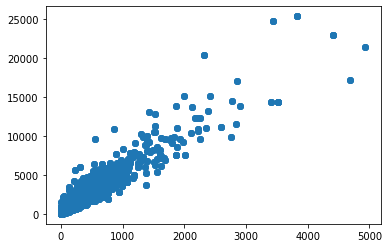

In [34]:
plt.scatter(supplier_d['placedorder'],supplier_d['addedtocart'])

In [35]:
corr, _ = pearsonr(supplier_d['placedorder'],supplier_d['addedtocart'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.959


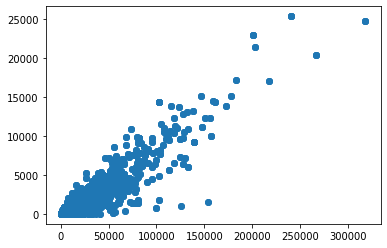

In [36]:
plt.scatter(supplier_d['trafficcount'],supplier_d['addedtocart'])

In [37]:
corr, _ = pearsonr(supplier_d['trafficcount'],supplier_d['addedtocart'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.931


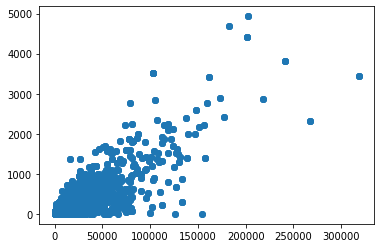

In [38]:
plt.scatter(supplier_d['trafficcount'],supplier_d['placedorder'])

In [39]:
corr, _ = pearsonr(supplier_d['trafficcount'],supplier_d['placedorder'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.850


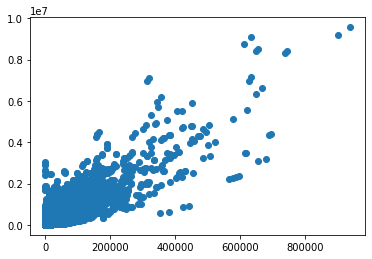

In [40]:
plt.scatter(supplier_d['grs1month'],supplier_d['grs12month'])

In [41]:
corr, _ = pearsonr(supplier_d['grs1month'],supplier_d['grs12month'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.883


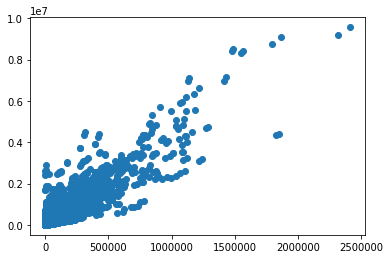

In [42]:
plt.scatter(supplier_d['grs2month'],supplier_d['grs12month'])

In [43]:
corr, _ = pearsonr(supplier_d['grs2month'],supplier_d['grs12month'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.915


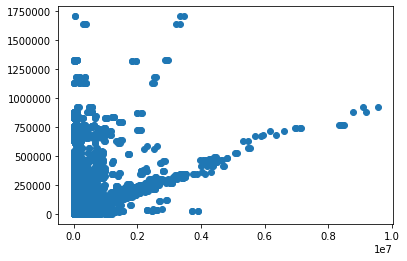

In [44]:
plt.scatter(supplier_d['grs12month'],supplier_d['expectedgrs'])

In [45]:
combine = pd.merge(supplier_d,module_c,how='left',on=['prsku','clid','clname','mkcname'])

In [46]:
combine['expectedgrs'].fillna((combine['expectedgrs'].mean()), inplace=True)
combine['grs1month'].fillna((combine['grs1month'].mean()), inplace=True)
combine['grs2month'].fillna((combine['grs2month'].mean()), inplace=True)
combine['grs3month'].fillna((combine['grs3month'].mean()), inplace=True)
combine['grs12month'].fillna((combine['grs12month'].mean()), inplace=True)

In [47]:
print(len(combine))
print(len(supplier_d))

9358854
9358854


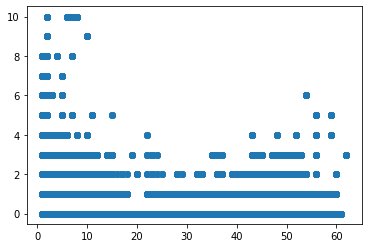

In [48]:
plt.scatter(combine['modulecount'],combine['videocount'])

In [49]:
combine.soname.value_counts()

Wayfair        3780277
Wayfair CA     3125167
Wayfair UK     1023116
Wayfair DE      978713
Perigold        246337
Joss & Main      86351
Birch Lane       64233
AllModern        54660
Name: soname, dtype: int64

In [50]:
supplier_d.soname.value_counts()

Wayfair        3780277
Wayfair CA     3125167
Wayfair UK     1023116
Wayfair DE      978713
Perigold        246337
Joss & Main      86351
Birch Lane       64233
AllModern        54660
Name: soname, dtype: int64

In [51]:
def ecdf(data):
    """ Compute ECDF """
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

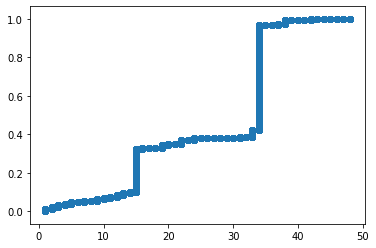

In [52]:
x,y = ecdf(supplier_d['clid'])
plt.scatter(x=x, y=y);

In [53]:
combine.head()

,prsku,soid,soname,clid,clname,mkcname,suid,iswaymore,addedtocart,placedorder,...,iscurrent,videocount,grs1month,grs2month,grs3month,grs12month,weightedavgscore,percentilerank,expectedgrs,modulecount
0,AAAM1028,3,Wayfair UK,21,Cribs,Nursery,1,0,0,0,...,1,0,0.000000,0.00000,0.000000,0.000000,NaN,NaN,3201.468683,NaN
1,AABK1087,4,Wayfair DE,18,Mattress Toppers and Pads,Mattresses - Utility Bedding,7080,0,45,5,...,1,0,265.558272,857.66493,3759.433838,6547.578930,NaN,NaN,3201.468683,NaN
2,AACE1000,6,Wayfair CA,15,Area Rugs,Rugs,1,0,0,0,...,1,0,0.000000,0.00000,0.000000,0.000000,NaN,NaN,3201.468683,NaN
3,AACF1003,3,Wayfair UK,15,Area Rugs,Rugs,4312,0,0,0,...,1,0,0.000000,0.00000,0.000000,342.437186,NaN,NaN,3201.468683,NaN
4,AACF1005,3,Wayfair UK,15,Area Rugs,Rugs,1,0,1,0,...,1,0,0.000000,0.00000,0.000000,0.000000,NaN,NaN,3201.468683,NaN


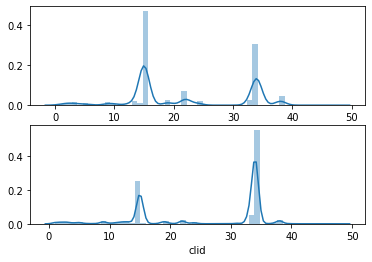

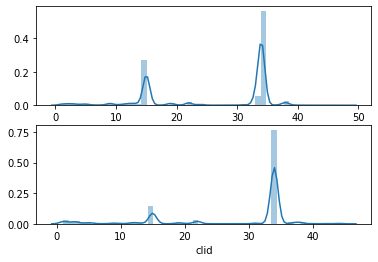

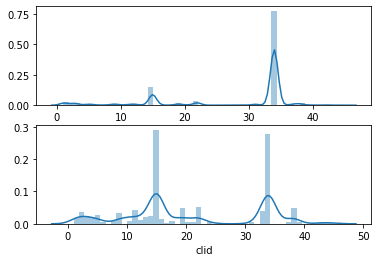

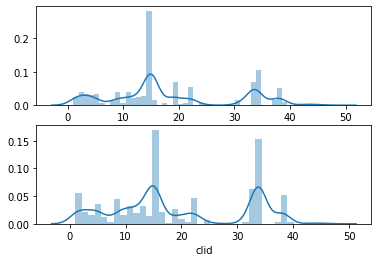

In [57]:
plt.figure(1)
plt.subplot(211)
sns.distplot(df_wayfair_pg['clid'])
plt.subplot(212)
sns.distplot(df_wayfair['clid'])
plt.figure(2)
plt.subplot(211)
sns.distplot(df_wayfair_ca['clid'])
plt.subplot(212)
sns.distplot(df_wayfair_uk['clid'])
plt.figure(3)
plt.subplot(211)
sns.distplot(df_wayfair_de['clid'])
plt.subplot(212)
sns.distplot(df_wayfair_jm['clid'])
plt.figure(4)
plt.subplot(211)
sns.distplot(df_wayfair_bl['clid'])
plt.subplot(212)
sns.distplot(df_wayfair_am['clid'])
plt.show()

In [58]:
print(df_wayfair_pg.clid.nunique())
print(df_wayfair.clid.nunique())
print(df_wayfair_ca.clid.nunique())
print(df_wayfair_uk.clid.nunique())
print(df_wayfair_de.clid.nunique())
print(df_wayfair_jm.clid.nunique())
print(df_wayfair_bl.clid.nunique())
print(df_wayfair_am.clid.nunique())

41
48
48
43
41
36
41
34


In [ ]:
combine_wayfiar = pd.merge(df_wayfair,content_r, on=['prsku','clid'])

In [ ]:
combine_wayfiar.tail()

In [ ]:
df_wayfair.clid.value_counts()

In [ ]:
df_wayfair.loc[df_wayfair['clid'] == 34]

In [ ]:
df2 = pd.DataFrame(df_wayfair_ca.groupby(['clid','iswaymore'])['prsku'].count())

In [ ]:
df2.tail(30)

In [ ]:
df_wayfair_ca.head()

In [ ]:
df_wayfair_ca[df_wayfair_ca['mkcname']=='Fireplaces & Grills']

In [ ]:
df1 = df_wayfair_ca[df_wayfair_ca['clname']=='Electric Grills']

In [ ]:
df_1 = df1[df1['iswaymore']==1]
print(df_1.addedtocart.sum())
print(df_1.placedorder.sum())

In [ ]:
df_1

In [ ]:
df_0 = df1[df1['iswaymore']==0]
print(df_0.addedtocart.sum())
print(df_0.placedorder.sum())

In [ ]:
df_prsku = df_1.loc[df1['prsku'] == 'CUI3214']

In [ ]:
df_prsku

In [ ]:
print(df_prsku.addedtocart.sum())
print(df_prsku.trafficcount.sum())
print(df_prsku.placedorder.sum())

In [ ]:
df_0.loc[df_0['clname']=='Electric Grills']
#df_prsku = df_0.loc[df_0['prsku'] == 'CUI3214']

In [ ]:
df_0.loc[df_0['suid']==8518]

In [ ]:
df_1.loc[df_1['suid']==716]

In [ ]:
df_0.loc[df_0['suid']==7717]

In [ ]:
df_0.loc[df_0['suid']==7681]

In [ ]:
supplier_d.head()

In [ ]:
ideal_pdp = supplier_d.groupby(['mkcname','clid','prsku','iscurrent','iswaymore'])['grs12month'].sum()

In [ ]:
ideal_pdp

In [ ]:
df_iscurrent = supplier_d[supplier_d['iscurrent'] == 1]

In [ ]:
df_final = df_iscurrent[df_iscurrent['iswaymore'] == 1]

In [ ]:
df_final.drop('expectedgrs',axis=1,inplace=True)

In [ ]:
df_final

In [ ]:
supplier_d['mkcname'].unique()

### Dataframes per marketing class i.e. 26 ###

In [298]:
df_Nursery_p = supplier_d[(supplier_d['mkcname'] == 'Nursery') & (supplier_d['iscurrent']==1) & (supplier_d['iswaymore']==1)]
df_Mat_Ut_p = supplier_d[(supplier_d['mkcname'] == 'Mattresses - Utility Bedding') & (supplier_d['iscurrent']==1) & (supplier_d['iswaymore']==1)]
df_Rugs_p = supplier_d[(supplier_d['mkcname'] == 'Rugs') & (supplier_d['iscurrent']==1) & (supplier_d['iswaymore']==1)]
df_Bedding_p = supplier_d[(supplier_d['mkcname'] == 'Bedding') & (supplier_d['iscurrent']==1) & (supplier_d['iswaymore']==1)]
df_Plumb_p = supplier_d[(supplier_d['mkcname'] == 'Plumbing - Vanities') & (supplier_d['iscurrent']==1) & (supplier_d['iswaymore']==1)]
df_Out_p = supplier_d[(supplier_d['mkcname'] == 'Outdoor') & (supplier_d['iscurrent']==1) & (supplier_d['iswaymore']==1)]
df_Ent_p = supplier_d[(supplier_d['mkcname'] == 'Entertainment Furniture') & (supplier_d['iscurrent']==1) & (supplier_d['iswaymore']==1)]
df_Youth_p = supplier_d[(supplier_d['mkcname'] == 'Youth Bedroom') & (supplier_d['iscurrent']==1) & (supplier_d['iswaymore']==1)]
df_Wall_p = supplier_d[(supplier_d['mkcname'] == 'Wall Art') & (supplier_d['iscurrent']==1) & (supplier_d['iswaymore']==1)]
df_Storage_p = supplier_d[(supplier_d['mkcname'] == 'Storage and Org') & (supplier_d['iscurrent']==1) & (supplier_d['iswaymore']==1)]
df_Fut_p = supplier_d[(supplier_d['mkcname'] == 'Furniture - Kitchen and Dining') & (supplier_d['iscurrent']==1) & (supplier_d['iswaymore']==1)]
df_M_p = supplier_d[(supplier_d['mkcname'] == 'Mattresses') & (supplier_d['iscurrent']==1) & (supplier_d['iswaymore']==1)]
df_F_bed_p = supplier_d[(supplier_d['mkcname'] == 'Furniture - Bedroom') & (supplier_d['iscurrent']==1) & (supplier_d['iswaymore']==1)]
df_Ac_F_p = supplier_d[(supplier_d['mkcname'] == 'Accent Furniture') & (supplier_d['iscurrent']==1) & (supplier_d['iswaymore']==1)]
df_f_H_p = supplier_d[(supplier_d['mkcname'] == 'Furniture - Home Office') & (supplier_d['iscurrent']==1) & (supplier_d['iswaymore']==1)]
df_uph_p = supplier_d[(supplier_d['mkcname'] == 'Upholstery - Core') & (supplier_d['iscurrent']==1) & (supplier_d['iswaymore']==1)]
df_light_p = supplier_d[(supplier_d['mkcname'] == 'Lighting') & (supplier_d['iscurrent']==1) & (supplier_d['iswaymore']==1)]
df_fire_p = supplier_d[(supplier_d['mkcname'] == 'Fireplaces & Grills') & (supplier_d['iscurrent']==1) & (supplier_d['iswaymore']==1)]
df_elect_p = supplier_d[(supplier_d['mkcname'] == 'Small Electrics') & (supplier_d['iscurrent']==1) & (supplier_d['iswaymore']==1)]
df_edu_p = supplier_d[(supplier_d['mkcname'] == 'Education') & (supplier_d['iscurrent']==1) & (supplier_d['iswaymore']==1)]
df_rec_p = supplier_d[(supplier_d['mkcname'] == 'Recreation') & (supplier_d['iscurrent']==1) & (supplier_d['iswaymore']==1)]
df_plu_core_p = supplier_d[(supplier_d['mkcname'] == 'Plumbing - Core') & (supplier_d['iscurrent']==1) & (supplier_d['iswaymore']==1)]
df_off_p = supplier_d[(supplier_d['mkcname'] == 'Office') & (supplier_d['iscurrent']==1) & (supplier_d['iswaymore']==1)]
df_Hard_p = supplier_d[(supplier_d['mkcname'] == 'Hardware') & (supplier_d['iscurrent']==1) & (supplier_d['iswaymore']==1)]
df_App_p = supplier_d[(supplier_d['mkcname'] == 'Appliances') & (supplier_d['iscurrent']==1) & (supplier_d['iswaymore']==1)]
df_pet_p = supplier_d[(supplier_d['mkcname'] == 'Pet') & (supplier_d['iscurrent']==1) & (supplier_d['iswaymore']==1)]

In [299]:
df_Nursery_l = supplier_d[(supplier_d['mkcname'] == 'Nursery') & (supplier_d['iscurrent']==0) & (supplier_d['iswaymore']==1)]
df_Mat_Ut_l = supplier_d[(supplier_d['mkcname'] == 'Mattresses - Utility Bedding') & (supplier_d['iscurrent']==0) & (supplier_d['iswaymore']==1)]
df_Rugs_l = supplier_d[(supplier_d['mkcname'] == 'Rugs') & (supplier_d['iscurrent']==0) & (supplier_d['iswaymore']==1)]
df_Bedding_l = supplier_d[(supplier_d['mkcname'] == 'Bedding') & (supplier_d['iscurrent']==0) & (supplier_d['iswaymore']==1)]
df_Plumb_l = supplier_d[(supplier_d['mkcname'] == 'Plumbing - Vanities') & (supplier_d['iscurrent']==0) & (supplier_d['iswaymore']==1)]
df_Out_l = supplier_d[(supplier_d['mkcname'] == 'Outdoor') & (supplier_d['iscurrent']==0) & (supplier_d['iswaymore']==1)]
df_Ent_l = supplier_d[(supplier_d['mkcname'] == 'Entertainment Furniture') & (supplier_d['iscurrent']==0) & (supplier_d['iswaymore']==1)]
df_Youth_l = supplier_d[(supplier_d['mkcname'] == 'Youth Bedroom') & (supplier_d['iscurrent']==0) & (supplier_d['iswaymore']==1)]
df_Wall_l = supplier_d[(supplier_d['mkcname'] == 'Wall Art') & (supplier_d['iscurrent']==0) & (supplier_d['iswaymore']==1)]
df_Storage_l = supplier_d[(supplier_d['mkcname'] == 'Storage and Org') & (supplier_d['iscurrent']==0) & (supplier_d['iswaymore']==1)]
df_Fut_l = supplier_d[(supplier_d['mkcname'] == 'Furniture - Kitchen and Dining') & (supplier_d['iscurrent']==0) & (supplier_d['iswaymore']==1)]
df_M_l = supplier_d[(supplier_d['mkcname'] == 'Mattresses') & (supplier_d['iscurrent']==0) & (supplier_d['iswaymore']==1)]
df_F_bed_l = supplier_d[(supplier_d['mkcname'] == 'Furniture - Bedroom') & (supplier_d['iscurrent']==0) & (supplier_d['iswaymore']==1)]
df_Ac_F_l = supplier_d[(supplier_d['mkcname'] == 'Accent Furniture') & (supplier_d['iscurrent']==0) & (supplier_d['iswaymore']==1)]
df_f_H_l = supplier_d[(supplier_d['mkcname'] == 'Furniture - Home Office') & (supplier_d['iscurrent']==0) & (supplier_d['iswaymore']==1)]
df_uph_l = supplier_d[(supplier_d['mkcname'] == 'Upholstery - Core') & (supplier_d['iscurrent']==0) & (supplier_d['iswaymore']==1)]
df_light_l = supplier_d[(supplier_d['mkcname'] == 'Lighting') & (supplier_d['iscurrent']==0) & (supplier_d['iswaymore']==1)]
df_fire_l = supplier_d[(supplier_d['mkcname'] == 'Fireplaces & Grills') & (supplier_d['iscurrent']==0) & (supplier_d['iswaymore']==1)]
df_elect_l = supplier_d[(supplier_d['mkcname'] == 'Small Electrics') & (supplier_d['iscurrent']==0) & (supplier_d['iswaymore']==1)]
df_edu_l = supplier_d[(supplier_d['mkcname'] == 'Education') & (supplier_d['iscurrent']==0) & (supplier_d['iswaymore']==1)]
df_rec_l = supplier_d[(supplier_d['mkcname'] == 'Recreation') & (supplier_d['iscurrent']==0) & (supplier_d['iswaymore']==1)]
df_plu_core_l = supplier_d[(supplier_d['mkcname'] == 'Plumbing - Core') & (supplier_d['iscurrent']==0) & (supplier_d['iswaymore']==1)]
df_off_l = supplier_d[(supplier_d['mkcname'] == 'Office') & (supplier_d['iscurrent']==0) & (supplier_d['iswaymore']==1)]
df_Hard_l = supplier_d[(supplier_d['mkcname'] == 'Hardware') & (supplier_d['iscurrent']==0) & (supplier_d['iswaymore']==1)]
df_App_l = supplier_d[(supplier_d['mkcname'] == 'Appliances') & (supplier_d['iscurrent']==0) & (supplier_d['iswaymore']==1)]
df_pet_l = supplier_d[(supplier_d['mkcname'] == 'Pet') & (supplier_d['iscurrent']==0) & (supplier_d['iswaymore']==1)]

In [354]:
df_Nursery_p.head()

,prsku,soid,soname,clid,clname,mkcname,suid,iswaymore,addedtocart,placedorder,trafficcount,iscurrent,videocount,grs1month,grs2month,grs3month,grs12month,weightedavgscore,percentilerank,expectedgrs
45336,AMOR1013,5,Birch Lane,21,Cribs,Nursery,3432,1,8,0,291,1,0,228.410600,228.410600,1015.538494,6303.433294,1.00063,0.53286,3201.468683
45337,AMOR1033,1,Wayfair,21,Cribs,Nursery,5,1,97,11,1361,1,0,0.000000,0.000000,146.295870,396.323270,1.00063,0.53286,3201.468683
59104,AMOR1013,6,Wayfair CA,21,Cribs,Nursery,3432,1,15,0,435,1,0,0.000000,303.949282,709.217498,5576.212822,1.00063,0.53286,3201.468683
59105,AMOR1033,6,Wayfair CA,21,Cribs,Nursery,3432,1,7,0,127,1,0,688.953636,688.953636,1456.067520,1933.706242,1.00063,0.53286,3201.468683
76285,BAFH1347,1,Wayfair,17,Gliders,Nursery,5,1,95,8,1677,1,0,0.000000,55.106870,55.106870,55.106870,1.00063,0.53286,3201.468683


In [355]:
df_Nursery_l.head()

,prsku,soid,soname,clid,clname,mkcname,suid,iswaymore,addedtocart,placedorder,trafficcount,iscurrent,videocount,grs1month,grs2month,grs3month,grs12month,weightedavgscore,percentilerank,expectedgrs
30012,AMOR1006,5,Birch Lane,21,Cribs,Nursery,1,1,3,0,61,0,0,0.0,0.000000,0.000000,1352.612906,1.00063,0.53286,3201.468683
81852,AMOR1013,7,Joss & Main,21,Cribs,Nursery,3432,1,9,0,247,0,0,0.0,231.230600,522.621200,4037.450400,1.00063,0.53286,3201.468683
84568,BAFH1768,1,Wayfair,17,Gliders,Nursery,107,1,8,0,212,0,0,0.0,0.000000,0.000000,0.000000,1.65000,0.98000,75685.835000
111290,AMOR1013,5,Birch Lane,21,Cribs,Nursery,1,1,19,0,283,0,0,0.0,787.127894,2574.086694,7106.165000,1.00063,0.53286,3201.468683
158925,AMOR1033,6,Wayfair CA,21,Cribs,Nursery,3432,1,3,0,118,0,0,0.0,767.113884,767.113884,1244.752606,1.00063,0.53286,3201.468683


In [ ]:
df_product = df_Nursery[df_Nursery['clname'] == 'Gliders']

In [ ]:
df_product

In [ ]:
df = df_product[df_product['trafficcount'] > 0]
df['conversion_rate'] = df['placedorder']/df['trafficcount']
df.drop(['grs2month','grs3month','grs12month','placedorder','trafficcount'],axis=1,inplace=True)

In [ ]:
df.fillna(new_df.mean())
df['weightedavgscore'] = df['weightedavgscore'].fillna(df['weightedavgscore'].mean())
df['percentilerank'] = df['percentilerank'].fillna(df['percentilerank'].mean())
df['expectedgrs'] = df['expectedgrs'].fillna(df['expectedgrs'].mean())
print(df.isnull().sum())

In [ ]:
new_df = df
new_df.head()

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
new_df['prsku'] = le.fit_transform(new_df['prsku'])
new_df['clname'] = le.fit_transform(new_df['clname'])
new_df['mkcname'] = le.fit_transform(new_df['mkcname'])
new_df['soname'] = le.fit_transform(df['soname'])

In [ ]:
new_df

In [ ]:
y = new_df['conversion_rate']
x = new_df.drop(['conversion_rate'],axis=1)
X = x

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

In [ ]:
new_pred = sorted(y_pred,reverse=True)

In [ ]:
for i in range(5):
    print(new_pred[i])

In [ ]:
X_test["y"] = y_pred

In [ ]:
X_test[X_test['y'] == 0.020038158084504928]

In [ ]:
df_product[df_product['addedtocart'] == 1510]

In [336]:
df_Nursery_p

,prsku,soid,soname,clid,clname,mkcname,suid,iswaymore,addedtocart,placedorder,trafficcount,iscurrent,videocount,grs1month,grs2month,grs3month,grs12month,weightedavgscore,percentilerank,expectedgrs
45336,AMOR1013,5,Birch Lane,21,Cribs,Nursery,3432,1,8,0,291,1,0,228.410600,228.410600,1015.538494,6303.433294,1.00063,0.53286,3201.468683
45337,AMOR1033,1,Wayfair,21,Cribs,Nursery,5,1,97,11,1361,1,0,0.000000,0.000000,146.295870,396.323270,1.00063,0.53286,3201.468683
59104,AMOR1013,6,Wayfair CA,21,Cribs,Nursery,3432,1,15,0,435,1,0,0.000000,303.949282,709.217498,5576.212822,1.00063,0.53286,3201.468683
59105,AMOR1033,6,Wayfair CA,21,Cribs,Nursery,3432,1,7,0,127,1,0,688.953636,688.953636,1456.067520,1933.706242,1.00063,0.53286,3201.468683
76285,BAFH1347,1,Wayfair,17,Gliders,Nursery,5,1,95,8,1677,1,0,0.000000,55.106870,55.106870,55.106870,1.00063,0.53286,3201.468683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9297792,PGRN1136,3,Wayfair UK,21,Cribs,Nursery,1,1,10,3,156,1,0,615.321744,821.119328,1404.234980,3045.475638,1.72000,0.99000,25452.041600
9302010,QH1321,6,Wayfair CA,21,Cribs,Nursery,6721,1,313,48,4776,1,0,7245.028004,11202.375552,25096.710884,101694.394064,1.00063,0.53286,3201.468683
9302011,QH1528,6,Wayfair CA,21,Cribs,Nursery,1,1,0,0,4,1,0,0.000000,0.000000,0.000000,0.000000,1.00063,0.53286,3201.468683
9325984,SIM1095,1,Wayfair,21,Cribs,Nursery,291,1,0,0,44,1,0,0.000000,0.000000,0.000000,762.321200,1.00063,0.53286,3201.468683


In [302]:
module_c.groupby(['mkcname','clname'])['prsku'].count()

mkcname                         clname                                  
Accent Furniture                Accent Chests / Cabinets                       373
Appliances                      Ranges                                         144
                                Wine Refrigerators                             240
Bedding                         Bedding Sets                                   280
Education                       Classroom Storage                              447
Entertainment Furniture         End Tables                                    1147
                                TV Stands & Entertainment Centers              654
Fireplaces & Grills             Charcoal Grills                                 30
                                Electric Grills                                  4
                                Gas Grills                                      88
                                Mantels                                         33
              

In [342]:
def recommend_class(df):
    array = df['clname'].unique()
    for product in array:
        df_product = df[df['clname'] == product]
        df_product = df_product[df_product['trafficcount'] > 0]
        df_product['conversion_rate'] = df_product['placedorder']/df_product['trafficcount']
        df_product.drop(['grs2month','grs3month','grs12month','placedorder','trafficcount','mkcname'],axis=1,inplace=True)
        df_product['weightedavgscore'] = df_product['weightedavgscore'].fillna(df_product['weightedavgscore'].mean())
        df_product['percentilerank'] = df_product['percentilerank'].fillna(df_product['percentilerank'].mean())
        df_product['expectedgrs'] = df_product['expectedgrs'].fillna(df_product['expectedgrs'].mean())   
        df_product['prsku'] = le.fit_transform(df_product['prsku'])
        df_product['clname'] = le.fit_transform(df_product['clname'])
        df_product['soname'] = le.fit_transform(df_product['soname'])    
        y = new_df['conversion_rate']
        x = new_df.drop(['conversion_rate'],axis=1)
        X = x
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
        reg = LinearRegression().fit(X_train, y_train)
        y_pred = reg.predict(X_test)
        error = mean_squared_error(y_test, y_pred)
        new_pred = sorted(y_pred,reverse=True)
        X_test["y"] = y_pred
        weights = []
        top10_ideal_product = pd.DataFrame()
        for i in range(10):
            weights.append(new_pred[i])
        for i in weights:
            temp = X_test[X_test['y']==i]
            top10_ideal_product = top10_ideal_product.append(temp)
    return error, top10_ideal_product, df_product,df

In [348]:
rmse, top10_ideal_product, df_product, df = recommend_class(df_Nursery_p)

In [349]:
top10_ideal_product

,prsku,soid,soname,clid,clname,mkcname,suid,iswaymore,addedtocart,iscurrent,videocount,grs1month,weightedavgscore,percentilerank,expectedgrs,y
8092550,593685,1,4,2,8,6,10053,0,24766,0,0,695177.366550,1.82000,0.99000,416029.035000,0.129798
596596,44865,1,4,2,8,6,34,0,25353,1,0,649162.469586,1.79000,0.99000,766960.269200,0.114277
3873311,853960,1,4,15,4,20,4878,1,21444,0,1,496054.618164,1.84000,1.00000,490154.124600,0.101590
4179420,1083738,1,4,1,42,4,745,1,14362,0,1,668667.343386,2.19000,1.00000,711117.635200,0.100867
4266206,1083738,1,4,1,42,4,1,1,14362,0,1,648083.923832,2.19000,1.00000,682092.425600,0.098235
8965711,1192824,1,4,19,40,23,1,1,9989,0,0,635107.480264,2.37000,1.00000,744032.193400,0.090004
4013580,853953,1,4,15,4,20,1515,1,17019,0,1,453404.575715,2.32000,1.00000,675395.393100,0.086386
3302951,1159824,1,4,3,17,6,1170,0,13852,1,0,471622.482674,1.79000,0.99000,362974.017000,0.076253
7131861,913153,1,4,2,8,6,1,1,12334,0,0,452699.656260,1.00063,0.53286,3201.468683,0.076038
2302249,609181,1,4,2,8,6,10227,0,11293,1,0,429423.382304,1.72000,0.99000,587339.176200,0.073399


array([1])

### Dataframes as per 8 store locations ###

In [55]:
df_wayfair    = supplier_d[supplier_d['soname']=='Wayfair']
df_wayfair_ca = supplier_d[supplier_d['soname']=='Wayfair CA']
df_wayfair_uk = supplier_d[supplier_d['soname']=='Wayfair UK']
df_wayfair_de = supplier_d[supplier_d['soname']=='Wayfair DE']
df_wayfair_pg = supplier_d[supplier_d['soname']=='Perigold']
df_wayfair_jm = supplier_d[supplier_d['soname']=='Joss & Main']
df_wayfair_bl = supplier_d[supplier_d['soname']=='Birch Lane']
df_wayfair_am = supplier_d[supplier_d['soname']=='AllModern']

In [56]:
supplier_d['soname'].unique()

array(['Wayfair UK', 'Wayfair DE', 'Wayfair CA', 'Wayfair', 'Joss & Main',
       'Perigold', 'AllModern', 'Birch Lane'], dtype=object)

### "Wayfair" Store location with 26 different marketing class ###

In [ ]:
df_w_Nursery = df_wayfair[(df_wayfair['mkcname'] == 'Nursery') & (df_wayfair['iscurrent'] == 1) & (df_wayfair['iswaymore']==1)]
df_w_Mat = df_wayfair[(df_wayfair['mkcname'] == 'Mattresses - Utility Bedding') & (df_wayfair['iscurrent'] == 1) & (df_wayfair['iswaymore']==1)]
df_w_Rugs = df_wayfair[(df_wayfair['mkcname'] == 'Rugs') & (df_wayfair['iscurrent'] == 1) & (df_wayfair['iswaymore']==1)]
df_w_Bedd = df_wayfair[(df_wayfair['mkcname'] == 'Bedding') & (df_wayfair['iscurrent'] == 1) & (df_wayfair['iswaymore']==1)]
df_w_Plumb = df_wayfair[(df_wayfair['mkcname'] == 'Plumbing - Vanities') & (df_wayfair['iscurrent'] == 1) & (df_wayfair['iswaymore']==1)]
df_w_Out = df_wayfair[(df_wayfair['mkcname'] == 'Outdoor') & (df_wayfair['iscurrent'] == 1) & (df_wayfair['iswaymore']==1)]
df_w_Ent = df_wayfair[(df_wayfair['mkcname'] == 'Entertainment Furniture') & (df_wayfair['iscurrent'] == 1) & (df_wayfair['iswaymore']==1)]
df_w_Youth = df_wayfair[(df_wayfair['mkcname'] == 'Youth Bedroom') & (df_wayfair['iscurrent'] == 1) & (df_wayfair['iswaymore']==1)]
df_w_wall = df_wayfair[(df_wayfair['mkcname'] == 'Wall Art') & (df_wayfair['iscurrent'] == 1) & (df_wayfair['iswaymore']==1)]
df_w_store = df_wayfair[(df_wayfair['mkcname'] == 'Storage and Org') & (df_wayfair['iscurrent'] == 1) & (df_wayfair['iswaymore']==1)]
df_w_Furniture_K = df_wayfair[(df_wayfair['mkcname'] == 'Furniture - Kitchen and Dining') & (df_wayfair['iscurrent'] == 1) & (df_wayfair['iswaymore']==1)]
df_w_Mattresses = df_wayfair[(df_wayfair['mkcname'] == 'Mattresses') & (df_wayfair['iscurrent'] == 1) & (df_wayfair['iswaymore']==1)]
df_w_Furniture_B = df_wayfair[(df_wayfair['mkcname'] == 'Furniture - Bedroom') & (df_wayfair['iscurrent'] == 1) & (df_wayfair['iswaymore']==1)]
df_w_Acc = df_wayfair[(df_wayfair['mkcname'] == 'Accent Furniture') & (df_wayfair['iscurrent'] == 1) & (df_wayfair['iswaymore']==1)]
df_w_Furniture_H = df_wayfair[(df_wayfair['mkcname'] == 'Furniture - Home Office') & (df_wayfair['iscurrent'] == 1) & (df_wayfair['iswaymore']==1)]
df_w_Uph = df_wayfair[(df_wayfair['mkcname'] == 'Upholstery - Core') & (df_wayfair['iscurrent'] == 1) & (df_wayfair['iswaymore']==1)]
df_w_Light = df_wayfair[(df_wayfair['mkcname'] == 'Lighting') & (df_wayfair['iscurrent'] == 1) & (df_wayfair['iswaymore']==1)]
df_w_Fire = df_wayfair[(df_wayfair['mkcname'] == 'Fireplaces & Grills') & (df_wayfair['iscurrent'] == 1) & (df_wayfair['iswaymore']==1)]
df_w_electics = df_wayfair[(df_wayfair['mkcname'] == 'Small Electrics') & (df_wayfair['iscurrent'] == 1) & (df_wayfair['iswaymore']==1)]
df_w_Edu = df_wayfair[(df_wayfair['mkcname'] == 'Education') & (df_wayfair['iscurrent'] == 1) & (df_wayfair['iswaymore']==1)]
df_w_Recre = df_wayfair[(df_wayfair['mkcname'] == 'Recreation') & (df_wayfair['iscurrent'] == 1) & (df_wayfair['iswaymore']==1)]
df_w_Plumb_C = df_wayfair[(df_wayfair['mkcname'] == 'Plumbing - Core') & (df_wayfair['iscurrent'] == 1) & (df_wayfair['iswaymore']==1)]
df_w_Off = df_wayfair[(df_wayfair['mkcname'] == 'Office') & (df_wayfair['iscurrent'] == 1) & (df_wayfair['iswaymore']==1)]
df_w_Hard = df_wayfair[(df_wayfair['mkcname'] == 'Hardware') & (df_wayfair['iscurrent'] == 1) & (df_wayfair['iswaymore']==1)]
df_w_App = df_wayfair[(df_wayfair['mkcname'] == 'Appliances') & (df_wayfair['iscurrent'] == 1) & (df_wayfair['iswaymore']==1)]
df_w_Pet = df_wayfair[(df_wayfair['mkcname'] == 'Pet') & (df_wayfair['iscurrent'] == 1) & (df_wayfair['iswaymore']==1)]


### "Wayfair Cali" Store location with 26 different marketing class ###

In [ ]:
df_w2_Nursery = df_wayfair_ca[(df_wayfair_ca['mkcname'] == 'Nursery') & (df_wayfair_ca['iscurrent'] == 1) & (df_wayfair_ca['iswaymore']==1)]
df_w2_Mat = df_wayfair_ca[(df_wayfair_ca['mkcname'] == 'Mattresses - Utility Bedding') & (df_wayfair_ca['iscurrent'] == 1) & (df_wayfair_ca['iswaymore']==1)]
df_w2_Rugs = df_wayfair_ca[(df_wayfair_ca['mkcname'] == 'Rugs') & (df_wayfair_ca['iscurrent'] == 1) & (df_wayfair_ca['iswaymore']==1)]
df_w2_Bedd = df_wayfair_ca[(df_wayfair_ca['mkcname'] == 'Bedding') & (df_wayfair_ca['iscurrent'] == 1) & (df_wayfair_ca['iswaymore']==1)]
df_w2_Plumb = df_wayfair_ca[(df_wayfair_ca['mkcname'] == 'Plumbing - Vanities') & (df_wayfair_ca['iscurrent'] == 1) & (df_wayfair_ca['iswaymore']==1)]
df_w2_Out = df_wayfair_ca[(df_wayfair_ca['mkcname'] == 'Outdoor') & (df_wayfair_ca['iscurrent'] == 1) & (df_wayfair_ca['iswaymore']==1)]
df_w2_Ent = df_wayfair_ca[(df_wayfair_ca['mkcname'] == 'Entertainment Furniture') & (df_wayfair_ca['iscurrent'] == 1) & (df_wayfair_ca['iswaymore']==1)]
df_w2_Youth = df_wayfair_ca[(df_wayfair_ca['mkcname'] == 'Youth Bedroom') & (df_wayfair_ca['iscurrent'] == 1) & (df_wayfair_ca['iswaymore']==1)]
df_w2_wall = df_wayfair_ca[(df_wayfair_ca['mkcname'] == 'Wall Art') & (df_wayfair_ca['iscurrent'] == 1) & (df_wayfair_ca['iswaymore']==1)]
df_w2_store = df_wayfair_ca[(df_wayfair_ca['mkcname'] == 'Storage and Org') & (df_wayfair_ca['iscurrent'] == 1) & (df_wayfair_ca['iswaymore']==1)]
df_w2_Furniture_K = df_wayfair_ca[(df_wayfair_ca['mkcname'] == 'Furniture - Kitchen and Dining') & (df_wayfair_ca['iscurrent'] == 1) & (df_wayfair_ca['iswaymore']==1)]
df_w2_Mattresses = df_wayfair_ca[(df_wayfair_ca['mkcname'] == 'Mattresses') & (df_wayfair_ca['iscurrent'] == 1) & (df_wayfair_ca['iswaymore']==1)]
df_w2_Furniture_B = df_wayfair_ca[(df_wayfair_ca['mkcname'] == 'Furniture - Bedroom') & (df_wayfair_ca['iscurrent'] == 1) & (df_wayfair_ca['iswaymore']==1)]
df_w2_Acc = df_wayfair_ca[(df_wayfair_ca['mkcname'] == 'Accent Furniture') & (df_wayfair_ca['iscurrent'] == 1) & (df_wayfair_ca['iswaymore']==1)]
df_w2_Furniture_H = df_wayfair_ca[(df_wayfair_ca['mkcname'] == 'Furniture - Home Office') & (df_wayfair_ca['iscurrent'] == 1) & (df_wayfair_ca['iswaymore']==1)]
df_w2_Uph = df_wayfair_ca[(df_wayfair_ca['mkcname'] == 'Upholstery - Core') & (df_wayfair_ca['iscurrent'] == 1) & (df_wayfair_ca['iswaymore']==1)]
df_w2_Light = df_wayfair_ca[(df_wayfair_ca['mkcname'] == 'Lighting') & (df_wayfair_ca['iscurrent'] == 1) & (df_wayfair_ca['iswaymore']==1)]
df_w2_Fire = df_wayfair_ca[(df_wayfair_ca['mkcname'] == 'Fireplaces & Grills') & (df_wayfair_ca['iscurrent'] == 1) & (df_wayfair_ca['iswaymore']==1)]
df_w2_electics = df_wayfair_ca[(df_wayfair_ca['mkcname'] == 'Small Electrics') & (df_wayfair_ca['iscurrent'] == 1) & (df_wayfair_ca['iswaymore']==1)]
df_w2_Edu = df_wayfair_ca[(df_wayfair_ca['mkcname'] == 'Education') & (df_wayfair_ca['iscurrent'] == 1) & (df_wayfair_ca['iswaymore']==1)]
df_w2_Recre = df_wayfair_ca[(df_wayfair_ca['mkcname'] == 'Recreation') & (df_wayfair_ca['iscurrent'] == 1) & (df_wayfair_ca['iswaymore']==1)]
df_w2_Plumb_C = df_wayfair_ca[(df_wayfair_ca['mkcname'] == 'Plumbing - Core') & (df_wayfair_ca['iscurrent'] == 1) & (df_wayfair_ca['iswaymore']==1)]
df_w2_Off = df_wayfair_ca[(df_wayfair_ca['mkcname'] == 'Office') & (df_wayfair_ca['iscurrent'] == 1) & (df_wayfair_ca['iswaymore']==1)]
df_w2_Hard = df_wayfair_ca[(df_wayfair_ca['mkcname'] == 'Hardware') & (df_wayfair_ca['iscurrent'] == 1) & (df_wayfair_ca['iswaymore']==1)]
df_w2_App = df_wayfair_ca[(df_wayfair_ca['mkcname'] == 'Appliances') & (df_wayfair_ca['iscurrent'] == 1) & (df_wayfair_ca['iswaymore']==1)]
df_w2_Pet = df_wayfair_ca[(df_wayfair_ca['mkcname'] == 'Pet') & (df_wayfair_ca['iscurrent'] == 1) & (df_wayfair_ca['iswaymore']==1)]


In [ ]:
df_w2_Acc.head()

In [ ]:
content_r.head()

In [ ]:
df = df_w2_Acc[df_w2_Acc['trafficcount'] > 0]

In [ ]:
df['online_customer'] = df['addedtocart']-df['placedorder']

In [ ]:
df['conversion_rate'] = df['placedorder']/df['trafficcount']

In [ ]:
df.conversion_rate.unique()

In [ ]:
df.drop('online_customer',axis=1,inplace=True)

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
new_df['prsku'] = le.fit_transform(new_df['prsku'])
new_df['clname'] = le.fit_transform(new_df['clname'])

In [ ]:
new_df

In [ ]:
new_df = df.drop(['soname','mkcname'],axis=1)

In [ ]:
new_df.fillna(new_df.mean())

new_df['weightedavgscore'] = new_df['weightedavgscore'].fillna(df['weightedavgscore'].mean())
new_df['percentilerank'] = new_df['percentilerank'].fillna(df['percentilerank'].mean())
new_df['expectedgrs'] = new_df['expectedgrs'].fillna(df['expectedgrs'].mean())
print(new_df.isnull().sum())

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

In [ ]:
new_df_scale

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
poly.fit_transform(new_df)

In [ ]:
new_df.drop(['grs2month','grs3month','grs12month'],axis=1,inplace=True)

In [ ]:
y = new_df['conversion_rate']
x = new_df.drop(['trafficcount','placedorder','conversion_rate'],axis=1)
X = x

In [ ]:
print(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
X_test["y"] = y_pred

In [ ]:
X_test[X_test['y'] == 0.011681254463519508]

In [ ]:
sort_y_pred = sorted(y_pred,reverse=True)

In [ ]:
for i in range(5):
    print(sort_y_pred[i])

In [ ]:
new_df

In [ ]:
max(y_pred)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

### "Wayfair UK" Store location with 26 different marketing class ###

In [ ]:
df_w3_Nursery = df_wayfair_uk[(df_wayfair_uk['mkcname'] == 'Nursery') & (df_wayfair_uk['iscurrent'] == 1) & (df_wayfair_uk['iswaymore']==1)]
df_w3_Mat = df_wayfair_uk[(df_wayfair_uk['mkcname'] == 'Mattresses - Utility Bedding') & (df_wayfair_uk['iscurrent'] == 1) & (df_wayfair_uk['iswaymore']==1)]
df_w3_Rugs = df_wayfair_uk[(df_wayfair_uk['mkcname'] == 'Rugs') & (df_wayfair_uk['iscurrent'] == 1) & (df_wayfair_uk['iswaymore']==1)]
df_w3_Bedd = df_wayfair_uk[(df_wayfair_uk['mkcname'] == 'Bedding') & (df_wayfair_uk['iscurrent'] == 1) & (df_wayfair_uk['iswaymore']==1)]
df_w3_Plumb = df_wayfair_uk[(df_wayfair_uk['mkcname'] == 'Plumbing - Vanities') & (df_wayfair_uk['iscurrent'] == 1) & (df_wayfair_uk['iswaymore']==1)]
df_w3_Out = df_wayfair_uk[(df_wayfair_uk['mkcname'] == 'Outdoor') & (df_wayfair_uk['iscurrent'] == 1) & (df_wayfair_uk['iswaymore']==1)]
df_w3_Ent = df_wayfair_uk[(df_wayfair_uk['mkcname'] == 'Entertainment Furniture') & (df_wayfair_uk['iscurrent'] == 1) & (df_wayfair_uk['iswaymore']==1)]
df_w3_Youth = df_wayfair_uk[(df_wayfair_uk['mkcname'] == 'Youth Bedroom') & (df_wayfair_uk['iscurrent'] == 1) & (df_wayfair_uk['iswaymore']==1)]
df_w3_wall = df_wayfair_uk[(df_wayfair_uk['mkcname'] == 'Wall Art') & (df_wayfair_uk['iscurrent'] == 1) & (df_wayfair_uk['iswaymore']==1)]
df_w3_store = df_wayfair_uk[(df_wayfair_uk['mkcname'] == 'Storage and Org') & (df_wayfair_uk['iscurrent'] == 1) & (df_wayfair_uk['iswaymore']==1)]
df_w3_Furniture_K = df_wayfair_uk[(df_wayfair_uk['mkcname'] == 'Furniture - Kitchen and Dining') & (df_wayfair_uk['iscurrent'] == 1) & (df_wayfair_uk['iswaymore']==1)]
df_w3_Mattresses = df_wayfair_uk[(df_wayfair_uk['mkcname'] == 'Mattresses') & (df_wayfair_uk['iscurrent'] == 1) & (df_wayfair_uk['iswaymore']==1)]
df_w3_Furniture_B = df_wayfair_uk[(df_wayfair_uk['mkcname'] == 'Furniture - Bedroom') & (df_wayfair_uk['iscurrent'] == 1) & (df_wayfair_uk['iswaymore']==1)]
df_w3_Acc = df_wayfair_uk[(df_wayfair_uk['mkcname'] == 'Accent Furniture') & (df_wayfair_uk['iscurrent'] == 1) & (df_wayfair_uk['iswaymore']==1)]
df_w3_Furniture_H = df_wayfair_uk[(df_wayfair_uk['mkcname'] == 'Furniture - Home Office') & (df_wayfair_uk['iscurrent'] == 1) & (df_wayfair_uk['iswaymore']==1)]
df_w3_Uph = df_wayfair_uk[(df_wayfair_uk['mkcname'] == 'Upholstery - Core') & (df_wayfair_uk['iscurrent'] == 1) & (df_wayfair_uk['iswaymore']==1)]
df_w3_Light = df_wayfair_uk[(df_wayfair_uk['mkcname'] == 'Lighting') & (df_wayfair_uk['iscurrent'] == 1) & (df_wayfair_uk['iswaymore']==1)]
df_w3_Fire = df_wayfair_uk[(df_wayfair_uk['mkcname'] == 'Fireplaces & Grills') & (df_wayfair_uk['iscurrent'] == 1) & (df_wayfair_uk['iswaymore']==1)]
df_w3_electics = df_wayfair_uk[(df_wayfair_uk['mkcname'] == 'Small Electrics') & (df_wayfair_uk['iscurrent'] == 1) & (df_wayfair_uk['iswaymore']==1)]
df_w3_Edu = df_wayfair_uk[(df_wayfair_uk['mkcname'] == 'Eduuktion') & (df_wayfair_uk['iscurrent'] == 1) & (df_wayfair_uk['iswaymore']==1)]
df_w3_Recre = df_wayfair_uk[(df_wayfair_uk['mkcname'] == 'Recreation') & (df_wayfair_uk['iscurrent'] == 1) & (df_wayfair_uk['iswaymore']==1)]
df_w3_Plumb_C = df_wayfair_uk[(df_wayfair_uk['mkcname'] == 'Plumbing - Core') & (df_wayfair_uk['iscurrent'] == 1) & (df_wayfair_uk['iswaymore']==1)]
df_w3_Off = df_wayfair_uk[(df_wayfair_uk['mkcname'] == 'Office') & (df_wayfair_uk['iscurrent'] == 1) & (df_wayfair_uk['iswaymore']==1)]
df_w3_Hard = df_wayfair_uk[(df_wayfair_uk['mkcname'] == 'Hardware') & (df_wayfair_uk['iscurrent'] == 1) & (df_wayfair_uk['iswaymore']==1)]
df_w3_App = df_wayfair_uk[(df_wayfair_uk['mkcname'] == 'Appliances') & (df_wayfair_uk['iscurrent'] == 1) & (df_wayfair_uk['iswaymore']==1)]
df_w3_Pet = df_wayfair_uk[(df_wayfair_uk['mkcname'] == 'Pet') & (df_wayfair_uk['iscurrent'] == 1) & (df_wayfair_uk['iswaymore']==1)]


### "Wayfair DE" Store location with 26 different marketing class ###

In [ ]:
df_w4_Nursery = df_wayfair_de[(df_wayfair_de['mkcname'] == 'Nursery') & (df_wayfair_de['iscurrent'] == 1) & (df_wayfair_de['iswaymore']==1)]
df_w4_Mat = df_wayfair_de[(df_wayfair_de['mkcname'] == 'Mattresses - Utility Bedding') & (df_wayfair_de['iscurrent'] == 1) & (df_wayfair_de['iswaymore']==1)]
df_w4_Rugs = df_wayfair_de[(df_wayfair_de['mkcname'] == 'Rugs') & (df_wayfair_de['iscurrent'] == 1) & (df_wayfair_de['iswaymore']==1)]
df_w4_Bedd = df_wayfair_de[(df_wayfair_de['mkcname'] == 'Bedding') & (df_wayfair_de['iscurrent'] == 1) & (df_wayfair_de['iswaymore']==1)]
df_w4_Plumb = df_wayfair_de[(df_wayfair_de['mkcname'] == 'Plumbing - Vanities') & (df_wayfair_de['iscurrent'] == 1) & (df_wayfair_de['iswaymore']==1)]
df_w4_Out = df_wayfair_de[(df_wayfair_de['mkcname'] == 'Outdoor') & (df_wayfair_de['iscurrent'] == 1) & (df_wayfair_de['iswaymore']==1)]
df_w4_Ent = df_wayfair_de[(df_wayfair_de['mkcname'] == 'Entertainment Furniture') & (df_wayfair_de['iscurrent'] == 1) & (df_wayfair_de['iswaymore']==1)]
df_w4_Youth = df_wayfair_de[(df_wayfair_de['mkcname'] == 'Youth Bedroom') & (df_wayfair_de['iscurrent'] == 1) & (df_wayfair_de['iswaymore']==1)]
df_w4_wall = df_wayfair_de[(df_wayfair_de['mkcname'] == 'Wall Art') & (df_wayfair_de['iscurrent'] == 1) & (df_wayfair_de['iswaymore']==1)]
df_w4_store = df_wayfair_de[(df_wayfair_de['mkcname'] == 'Storage and Org') & (df_wayfair_de['iscurrent'] == 1) & (df_wayfair_de['iswaymore']==1)]
df_w4_Furniture_K = df_wayfair_de[(df_wayfair_de['mkcname'] == 'Furniture - Kitchen and Dining') & (df_wayfair_de['iscurrent'] == 1) & (df_wayfair_de['iswaymore']==1)]
df_w4_Mattresses = df_wayfair_de[(df_wayfair_de['mkcname'] == 'Mattresses') & (df_wayfair_de['iscurrent'] == 1) & (df_wayfair_de['iswaymore']==1)]
df_w4_Furniture_B = df_wayfair_de[(df_wayfair_de['mkcname'] == 'Furniture - Bedroom') & (df_wayfair_de['iscurrent'] == 1) & (df_wayfair_de['iswaymore']==1)]
df_w4_Acc = df_wayfair_de[(df_wayfair_de['mkcname'] == 'Accent Furniture') & (df_wayfair_de['iscurrent'] == 1) & (df_wayfair_de['iswaymore']==1)]
df_w4_Furniture_H = df_wayfair_de[(df_wayfair_de['mkcname'] == 'Furniture - Home Office') & (df_wayfair_de['iscurrent'] == 1) & (df_wayfair_de['iswaymore']==1)]
df_w4_Uph = df_wayfair_de[(df_wayfair_de['mkcname'] == 'Upholstery - Core') & (df_wayfair_de['iscurrent'] == 1) & (df_wayfair_de['iswaymore']==1)]
df_w4_Light = df_wayfair_de[(df_wayfair_de['mkcname'] == 'Lighting') & (df_wayfair_de['iscurrent'] == 1) & (df_wayfair_de['iswaymore']==1)]
df_w4_Fire = df_wayfair_de[(df_wayfair_de['mkcname'] == 'Fireplaces & Grills') & (df_wayfair_de['iscurrent'] == 1) & (df_wayfair_de['iswaymore']==1)]
df_w4_electics = df_wayfair_de[(df_wayfair_de['mkcname'] == 'Small Electrics') & (df_wayfair_de['iscurrent'] == 1) & (df_wayfair_de['iswaymore']==1)]
df_w4_Edu = df_wayfair_de[(df_wayfair_de['mkcname'] == 'Edudetion') & (df_wayfair_de['iscurrent'] == 1) & (df_wayfair_de['iswaymore']==1)]
df_w4_Recre = df_wayfair_de[(df_wayfair_de['mkcname'] == 'Recreation') & (df_wayfair_de['iscurrent'] == 1) & (df_wayfair_de['iswaymore']==1)]
df_w4_Plumb_C = df_wayfair_de[(df_wayfair_de['mkcname'] == 'Plumbing - Core') & (df_wayfair_de['iscurrent'] == 1) & (df_wayfair_de['iswaymore']==1)]
df_w4_Off = df_wayfair_de[(df_wayfair_de['mkcname'] == 'Office') & (df_wayfair_de['iscurrent'] == 1) & (df_wayfair_de['iswaymore']==1)]
df_w4_Hard = df_wayfair_de[(df_wayfair_de['mkcname'] == 'Hardware') & (df_wayfair_de['iscurrent'] == 1) & (df_wayfair_de['iswaymore']==1)]
df_w4_App = df_wayfair_de[(df_wayfair_de['mkcname'] == 'Appliances') & (df_wayfair_de['iscurrent'] == 1) & (df_wayfair_de['iswaymore']==1)]
df_w4_Pet = df_wayfair_de[(df_wayfair_de['mkcname'] == 'Pet') & (df_wayfair_de['iscurrent'] == 1) & (df_wayfair_de['iswaymore']==1)]

### "Perigold" Store location with 26 different marketing class ###

In [ ]:
df_w5_Nursery = df_wayfair_pg[(df_wayfair_pg['mkcname'] == 'Nursery') & (df_wayfair_pg['iscurrent'] == 1) & (df_wayfair_pg['iswaymore']==1)]
df_w5_Mat = df_wayfair_pg[(df_wayfair_pg['mkcname'] == 'Mattresses - Utility Bedding') & (df_wayfair_pg['iscurrent'] == 1) & (df_wayfair_pg['iswaymore']==1)]
df_w5_Rugs = df_wayfair_pg[(df_wayfair_pg['mkcname'] == 'Rugs') & (df_wayfair_pg['iscurrent'] == 1) & (df_wayfair_pg['iswaymore']==1)]
df_w5_Bedd = df_wayfair_pg[(df_wayfair_pg['mkcname'] == 'Bedding') & (df_wayfair_pg['iscurrent'] == 1) & (df_wayfair_pg['iswaymore']==1)]
df_w5_Plumb = df_wayfair_pg[(df_wayfair_pg['mkcname'] == 'Plumbing - Vanities') & (df_wayfair_pg['iscurrent'] == 1) & (df_wayfair_pg['iswaymore']==1)]
df_w5_Out = df_wayfair_pg[(df_wayfair_pg['mkcname'] == 'Outdoor') & (df_wayfair_pg['iscurrent'] == 1) & (df_wayfair_pg['iswaymore']==1)]
df_w5_Ent = df_wayfair_pg[(df_wayfair_pg['mkcname'] == 'Entertainment Furniture') & (df_wayfair_pg['iscurrent'] == 1) & (df_wayfair_pg['iswaymore']==1)]
df_w5_Youth = df_wayfair_pg[(df_wayfair_pg['mkcname'] == 'Youth Bedroom') & (df_wayfair_pg['iscurrent'] == 1) & (df_wayfair_pg['iswaymore']==1)]
df_w5_wall = df_wayfair_pg[(df_wayfair_pg['mkcname'] == 'Wall Art') & (df_wayfair_pg['iscurrent'] == 1) & (df_wayfair_pg['iswaymore']==1)]
df_w5_store = df_wayfair_pg[(df_wayfair_pg['mkcname'] == 'Storage and Org') & (df_wayfair_pg['iscurrent'] == 1) & (df_wayfair_pg['iswaymore']==1)]
df_w5_Furniture_K = df_wayfair_pg[(df_wayfair_pg['mkcname'] == 'Furniture - Kitchen and Dining') & (df_wayfair_pg['iscurrent'] == 1) & (df_wayfair_pg['iswaymore']==1)]
df_w5_Mattresses = df_wayfair_pg[(df_wayfair_pg['mkcname'] == 'Mattresses') & (df_wayfair_pg['iscurrent'] == 1) & (df_wayfair_pg['iswaymore']==1)]
df_w5_Furniture_B = df_wayfair_pg[(df_wayfair_pg['mkcname'] == 'Furniture - Bedroom') & (df_wayfair_pg['iscurrent'] == 1) & (df_wayfair_pg['iswaymore']==1)]
df_w5_Acc = df_wayfair_pg[(df_wayfair_pg['mkcname'] == 'Accent Furniture') & (df_wayfair_pg['iscurrent'] == 1) & (df_wayfair_pg['iswaymore']==1)]
df_w5_Furniture_H = df_wayfair_pg[(df_wayfair_pg['mkcname'] == 'Furniture - Home Office') & (df_wayfair_pg['iscurrent'] == 1) & (df_wayfair_pg['iswaymore']==1)]
df_w5_Uph = df_wayfair_pg[(df_wayfair_pg['mkcname'] == 'Upholstery - Core') & (df_wayfair_pg['iscurrent'] == 1) & (df_wayfair_pg['iswaymore']==1)]
df_w5_Light = df_wayfair_pg[(df_wayfair_pg['mkcname'] == 'Lighting') & (df_wayfair_pg['iscurrent'] == 1) & (df_wayfair_pg['iswaymore']==1)]
df_w5_Fire = df_wayfair_pg[(df_wayfair_pg['mkcname'] == 'Fireplaces & Grills') & (df_wayfair_pg['iscurrent'] == 1) & (df_wayfair_pg['iswaymore']==1)]
df_w5_electics = df_wayfair_pg[(df_wayfair_pg['mkcname'] == 'Small Electrics') & (df_wayfair_pg['iscurrent'] == 1) & (df_wayfair_pg['iswaymore']==1)]
df_w5_Edu = df_wayfair_pg[(df_wayfair_pg['mkcname'] == 'Edupgtion') & (df_wayfair_pg['iscurrent'] == 1) & (df_wayfair_pg['iswaymore']==1)]
df_w5_Recre = df_wayfair_pg[(df_wayfair_pg['mkcname'] == 'Recreation') & (df_wayfair_pg['iscurrent'] == 1) & (df_wayfair_pg['iswaymore']==1)]
df_w5_Plumb_C = df_wayfair_pg[(df_wayfair_pg['mkcname'] == 'Plumbing - Core') & (df_wayfair_pg['iscurrent'] == 1) & (df_wayfair_pg['iswaymore']==1)]
df_w5_Off = df_wayfair_pg[(df_wayfair_pg['mkcname'] == 'Office') & (df_wayfair_pg['iscurrent'] == 1) & (df_wayfair_pg['iswaymore']==1)]
df_w5_Hard = df_wayfair_pg[(df_wayfair_pg['mkcname'] == 'Hardware') & (df_wayfair_pg['iscurrent'] == 1) & (df_wayfair_pg['iswaymore']==1)]
df_w5_App = df_wayfair_pg[(df_wayfair_pg['mkcname'] == 'Appliances') & (df_wayfair_pg['iscurrent'] == 1) & (df_wayfair_pg['iswaymore']==1)]
df_w5_Pet = df_wayfair_pg[(df_wayfair_pg['mkcname'] == 'Pet') & (df_wayfair_pg['iscurrent'] == 1) & (df_wayfair_pg['iswaymore']==1)]

### "Joss & Main" Store location with 26 different marketing class ###

In [ ]:
df_w6_Nursery = df_wayfair_jm[(df_wayfair_jm['mkcname'] == 'Nursery') & (df_wayfair_jm['iscurrent'] == 1) & (df_wayfair_jm['iswaymore']==1)]
df_w6_Mat = df_wayfair_jm[(df_wayfair_jm['mkcname'] == 'Mattresses - Utility Bedding') & (df_wayfair_jm['iscurrent'] == 1) & (df_wayfair_jm['iswaymore']==1)]
df_w6_Rugs = df_wayfair_jm[(df_wayfair_jm['mkcname'] == 'Rugs') & (df_wayfair_jm['iscurrent'] == 1) & (df_wayfair_jm['iswaymore']==1)]
df_w6_Bedd = df_wayfair_jm[(df_wayfair_jm['mkcname'] == 'Bedding') & (df_wayfair_jm['iscurrent'] == 1) & (df_wayfair_jm['iswaymore']==1)]
df_w6_Plumb = df_wayfair_jm[(df_wayfair_jm['mkcname'] == 'Plumbing - Vanities') & (df_wayfair_jm['iscurrent'] == 1) & (df_wayfair_jm['iswaymore']==1)]
df_w6_Out = df_wayfair_jm[(df_wayfair_jm['mkcname'] == 'Outdoor') & (df_wayfair_jm['iscurrent'] == 1) & (df_wayfair_jm['iswaymore']==1)]
df_w6_Ent = df_wayfair_jm[(df_wayfair_jm['mkcname'] == 'Entertainment Furniture') & (df_wayfair_jm['iscurrent'] == 1) & (df_wayfair_jm['iswaymore']==1)]
df_w6_Youth = df_wayfair_jm[(df_wayfair_jm['mkcname'] == 'Youth Bedroom') & (df_wayfair_jm['iscurrent'] == 1) & (df_wayfair_jm['iswaymore']==1)]
df_w6_wall = df_wayfair_jm[(df_wayfair_jm['mkcname'] == 'Wall Art') & (df_wayfair_jm['iscurrent'] == 1) & (df_wayfair_jm['iswaymore']==1)]
df_w6_store = df_wayfair_jm[(df_wayfair_jm['mkcname'] == 'Storage and Org') & (df_wayfair_jm['iscurrent'] == 1) & (df_wayfair_jm['iswaymore']==1)]
df_w6_Furniture_K = df_wayfair_jm[(df_wayfair_jm['mkcname'] == 'Furniture - Kitchen and Dining') & (df_wayfair_jm['iscurrent'] == 1) & (df_wayfair_jm['iswaymore']==1)]
df_w6_Mattresses = df_wayfair_jm[(df_wayfair_jm['mkcname'] == 'Mattresses') & (df_wayfair_jm['iscurrent'] == 1) & (df_wayfair_jm['iswaymore']==1)]
df_w6_Furniture_B = df_wayfair_jm[(df_wayfair_jm['mkcname'] == 'Furniture - Bedroom') & (df_wayfair_jm['iscurrent'] == 1) & (df_wayfair_jm['iswaymore']==1)]
df_w6_Acc = df_wayfair_jm[(df_wayfair_jm['mkcname'] == 'Accent Furniture') & (df_wayfair_jm['iscurrent'] == 1) & (df_wayfair_jm['iswaymore']==1)]
df_w6_Furniture_H = df_wayfair_jm[(df_wayfair_jm['mkcname'] == 'Furniture - Home Office') & (df_wayfair_jm['iscurrent'] == 1) & (df_wayfair_jm['iswaymore']==1)]
df_w6_Uph = df_wayfair_jm[(df_wayfair_jm['mkcname'] == 'Upholstery - Core') & (df_wayfair_jm['iscurrent'] == 1) & (df_wayfair_jm['iswaymore']==1)]
df_w6_Light = df_wayfair_jm[(df_wayfair_jm['mkcname'] == 'Lighting') & (df_wayfair_jm['iscurrent'] == 1) & (df_wayfair_jm['iswaymore']==1)]
df_w6_Fire = df_wayfair_jm[(df_wayfair_jm['mkcname'] == 'Fireplaces & Grills') & (df_wayfair_jm['iscurrent'] == 1) & (df_wayfair_jm['iswaymore']==1)]
df_w6_electics = df_wayfair_jm[(df_wayfair_jm['mkcname'] == 'Small Electrics') & (df_wayfair_jm['iscurrent'] == 1) & (df_wayfair_jm['iswaymore']==1)]
df_w6_Edu = df_wayfair_jm[(df_wayfair_jm['mkcname'] == 'Edujmtion') & (df_wayfair_jm['iscurrent'] == 1) & (df_wayfair_jm['iswaymore']==1)]
df_w6_Recre = df_wayfair_jm[(df_wayfair_jm['mkcname'] == 'Recreation') & (df_wayfair_jm['iscurrent'] == 1) & (df_wayfair_jm['iswaymore']==1)]
df_w6_Plumb_C = df_wayfair_jm[(df_wayfair_jm['mkcname'] == 'Plumbing - Core') & (df_wayfair_jm['iscurrent'] == 1) & (df_wayfair_jm['iswaymore']==1)]
df_w6_Off = df_wayfair_jm[(df_wayfair_jm['mkcname'] == 'Office') & (df_wayfair_jm['iscurrent'] == 1) & (df_wayfair_jm['iswaymore']==1)]
df_w6_Hard = df_wayfair_jm[(df_wayfair_jm['mkcname'] == 'Hardware') & (df_wayfair_jm['iscurrent'] == 1) & (df_wayfair_jm['iswaymore']==1)]
df_w6_App = df_wayfair_jm[(df_wayfair_jm['mkcname'] == 'Appliances') & (df_wayfair_jm['iscurrent'] == 1) & (df_wayfair_jm['iswaymore']==1)]
df_w6_Pet = df_wayfair_jm[(df_wayfair_jm['mkcname'] == 'Pet') & (df_wayfair_jm['iscurrent'] == 1) & (df_wayfair_jm['iswaymore']==1)]

### "Birch Lane" Store location with 26 different marketing class ###

In [ ]:
df_w7_Nursery = df_wayfair_bl[(df_wayfair_bl['mkcname'] == 'Nursery') & (df_wayfair_bl['iscurrent'] == 1) & (df_wayfair_bl['iswaymore']==1)]
df_w7_Mat = df_wayfair_bl[(df_wayfair_bl['mkcname'] == 'Mattresses - Utility Bedding') & (df_wayfair_bl['iscurrent'] == 1) & (df_wayfair_bl['iswaymore']==1)]
df_w7_Rugs = df_wayfair_bl[(df_wayfair_bl['mkcname'] == 'Rugs') & (df_wayfair_bl['iscurrent'] == 1) & (df_wayfair_bl['iswaymore']==1)]
df_w7_Bedd = df_wayfair_bl[(df_wayfair_bl['mkcname'] == 'Bedding') & (df_wayfair_bl['iscurrent'] == 1) & (df_wayfair_bl['iswaymore']==1)]
df_w7_Plumb = df_wayfair_bl[(df_wayfair_bl['mkcname'] == 'Plumbing - Vanities') & (df_wayfair_bl['iscurrent'] == 1) & (df_wayfair_bl['iswaymore']==1)]
df_w7_Out = df_wayfair_bl[(df_wayfair_bl['mkcname'] == 'Outdoor') & (df_wayfair_bl['iscurrent'] == 1) & (df_wayfair_bl['iswaymore']==1)]
df_w7_Ent = df_wayfair_bl[(df_wayfair_bl['mkcname'] == 'Entertainment Furniture') & (df_wayfair_bl['iscurrent'] == 1) & (df_wayfair_bl['iswaymore']==1)]
df_w7_Youth = df_wayfair_bl[(df_wayfair_bl['mkcname'] == 'Youth Bedroom') & (df_wayfair_bl['iscurrent'] == 1) & (df_wayfair_bl['iswaymore']==1)]
df_w7_wall = df_wayfair_bl[(df_wayfair_bl['mkcname'] == 'Wall Art') & (df_wayfair_bl['iscurrent'] == 1) & (df_wayfair_bl['iswaymore']==1)]
df_w7_store = df_wayfair_bl[(df_wayfair_bl['mkcname'] == 'Storage and Org') & (df_wayfair_bl['iscurrent'] == 1) & (df_wayfair_bl['iswaymore']==1)]
df_w7_Furniture_K = df_wayfair_bl[(df_wayfair_bl['mkcname'] == 'Furniture - Kitchen and Dining') & (df_wayfair_bl['iscurrent'] == 1) & (df_wayfair_bl['iswaymore']==1)]
df_w7_Mattresses = df_wayfair_bl[(df_wayfair_bl['mkcname'] == 'Mattresses') & (df_wayfair_bl['iscurrent'] == 1) & (df_wayfair_bl['iswaymore']==1)]
df_w7_Furniture_B = df_wayfair_bl[(df_wayfair_bl['mkcname'] == 'Furniture - Bedroom') & (df_wayfair_bl['iscurrent'] == 1) & (df_wayfair_bl['iswaymore']==1)]
df_w7_Acc = df_wayfair_bl[(df_wayfair_bl['mkcname'] == 'Accent Furniture') & (df_wayfair_bl['iscurrent'] == 1) & (df_wayfair_bl['iswaymore']==1)]
df_w7_Furniture_H = df_wayfair_bl[(df_wayfair_bl['mkcname'] == 'Furniture - Home Office') & (df_wayfair_bl['iscurrent'] == 1) & (df_wayfair_bl['iswaymore']==1)]
df_w7_Uph = df_wayfair_bl[(df_wayfair_bl['mkcname'] == 'Upholstery - Core') & (df_wayfair_bl['iscurrent'] == 1) & (df_wayfair_bl['iswaymore']==1)]
df_w7_Light = df_wayfair_bl[(df_wayfair_bl['mkcname'] == 'Lighting') & (df_wayfair_bl['iscurrent'] == 1) & (df_wayfair_bl['iswaymore']==1)]
df_w7_Fire = df_wayfair_bl[(df_wayfair_bl['mkcname'] == 'Fireplaces & Grills') & (df_wayfair_bl['iscurrent'] == 1) & (df_wayfair_bl['iswaymore']==1)]
df_w7_electics = df_wayfair_bl[(df_wayfair_bl['mkcname'] == 'Small Electrics') & (df_wayfair_bl['iscurrent'] == 1) & (df_wayfair_bl['iswaymore']==1)]
df_w7_Edu = df_wayfair_bl[(df_wayfair_bl['mkcname'] == 'Edubltion') & (df_wayfair_bl['iscurrent'] == 1) & (df_wayfair_bl['iswaymore']==1)]
df_w7_Recre = df_wayfair_bl[(df_wayfair_bl['mkcname'] == 'Recreation') & (df_wayfair_bl['iscurrent'] == 1) & (df_wayfair_bl['iswaymore']==1)]
df_w7_Plumb_C = df_wayfair_bl[(df_wayfair_bl['mkcname'] == 'Plumbing - Core') & (df_wayfair_bl['iscurrent'] == 1) & (df_wayfair_bl['iswaymore']==1)]
df_w7_Off = df_wayfair_bl[(df_wayfair_bl['mkcname'] == 'Office') & (df_wayfair_bl['iscurrent'] == 1) & (df_wayfair_bl['iswaymore']==1)]
df_w7_Hard = df_wayfair_bl[(df_wayfair_bl['mkcname'] == 'Hardware') & (df_wayfair_bl['iscurrent'] == 1) & (df_wayfair_bl['iswaymore']==1)]
df_w7_App = df_wayfair_bl[(df_wayfair_bl['mkcname'] == 'Appliances') & (df_wayfair_bl['iscurrent'] == 1) & (df_wayfair_bl['iswaymore']==1)]
df_w7_Pet = df_wayfair_bl[(df_wayfair_bl['mkcname'] == 'Pet') & (df_wayfair_bl['iscurrent'] == 1) & (df_wayfair_bl['iswaymore']==1)]

### "AllModern" Store location with 26 different marketing class ###

In [ ]:
df_w8_Nursery = df_wayfair_am[(df_wayfair_am['mkcname'] == 'Nursery') & (df_wayfair_am['iscurrent'] == 1) & (df_wayfair_am['iswaymore']==1)]
df_w8_Mat = df_wayfair_am[(df_wayfair_am['mkcname'] == 'Mattresses - Utility Bedding') & (df_wayfair_am['iscurrent'] == 1) & (df_wayfair_am['iswaymore']==1)]
df_w8_Rugs = df_wayfair_am[(df_wayfair_am['mkcname'] == 'Rugs') & (df_wayfair_am['iscurrent'] == 1) & (df_wayfair_am['iswaymore']==1)]
df_w8_Bedd = df_wayfair_am[(df_wayfair_am['mkcname'] == 'Bedding') & (df_wayfair_am['iscurrent'] == 1) & (df_wayfair_am['iswaymore']==1)]
df_w8_Plumb = df_wayfair_am[(df_wayfair_am['mkcname'] == 'Plumbing - Vanities') & (df_wayfair_am['iscurrent'] == 1) & (df_wayfair_am['iswaymore']==1)]
df_w8_Out = df_wayfair_am[(df_wayfair_am['mkcname'] == 'Outdoor') & (df_wayfair_am['iscurrent'] == 1) & (df_wayfair_am['iswaymore']==1)]
df_w8_Ent = df_wayfair_am[(df_wayfair_am['mkcname'] == 'Entertainment Furniture') & (df_wayfair_am['iscurrent'] == 1) & (df_wayfair_am['iswaymore']==1)]
df_w8_Youth = df_wayfair_am[(df_wayfair_am['mkcname'] == 'Youth Bedroom') & (df_wayfair_am['iscurrent'] == 1) & (df_wayfair_am['iswaymore']==1)]
df_w8_wall = df_wayfair_am[(df_wayfair_am['mkcname'] == 'Wall Art') & (df_wayfair_am['iscurrent'] == 1) & (df_wayfair_am['iswaymore']==1)]
df_w8_store = df_wayfair_am[(df_wayfair_am['mkcname'] == 'Storage and Org') & (df_wayfair_am['iscurrent'] == 1) & (df_wayfair_am['iswaymore']==1)]
df_w8_Furniture_K = df_wayfair_am[(df_wayfair_am['mkcname'] == 'Furniture - Kitchen and Dining') & (df_wayfair_am['iscurrent'] == 1) & (df_wayfair_am['iswaymore']==1)]
df_w8_Mattresses = df_wayfair_am[(df_wayfair_am['mkcname'] == 'Mattresses') & (df_wayfair_am['iscurrent'] == 1) & (df_wayfair_am['iswaymore']==1)]
df_w8_Furniture_B = df_wayfair_am[(df_wayfair_am['mkcname'] == 'Furniture - Bedroom') & (df_wayfair_am['iscurrent'] == 1) & (df_wayfair_am['iswaymore']==1)]
df_w8_Acc = df_wayfair_am[(df_wayfair_am['mkcname'] == 'Accent Furniture') & (df_wayfair_am['iscurrent'] == 1) & (df_wayfair_am['iswaymore']==1)]
df_w8_Furniture_H = df_wayfair_am[(df_wayfair_am['mkcname'] == 'Furniture - Home Office') & (df_wayfair_am['iscurrent'] == 1) & (df_wayfair_am['iswaymore']==1)]
df_w8_Uph = df_wayfair_am[(df_wayfair_am['mkcname'] == 'Upholstery - Core') & (df_wayfair_am['iscurrent'] == 1) & (df_wayfair_am['iswaymore']==1)]
df_w8_Light = df_wayfair_am[(df_wayfair_am['mkcname'] == 'Lighting') & (df_wayfair_am['iscurrent'] == 1) & (df_wayfair_am['iswaymore']==1)]
df_w8_Fire = df_wayfair_am[(df_wayfair_am['mkcname'] == 'Fireplaces & Grills') & (df_wayfair_am['iscurrent'] == 1) & (df_wayfair_am['iswaymore']==1)]
df_w8_electics = df_wayfair_am[(df_wayfair_am['mkcname'] == 'Small Electrics') & (df_wayfair_am['iscurrent'] == 1) & (df_wayfair_am['iswaymore']==1)]
df_w8_Edu = df_wayfair_am[(df_wayfair_am['mkcname'] == 'Eduamtion') & (df_wayfair_am['iscurrent'] == 1) & (df_wayfair_am['iswaymore']==1)]
df_w8_Recre = df_wayfair_am[(df_wayfair_am['mkcname'] == 'Recreation') & (df_wayfair_am['iscurrent'] == 1) & (df_wayfair_am['iswaymore']==1)]
df_w8_Plumb_C = df_wayfair_am[(df_wayfair_am['mkcname'] == 'Plumbing - Core') & (df_wayfair_am['iscurrent'] == 1) & (df_wayfair_am['iswaymore']==1)]
df_w8_Off = df_wayfair_am[(df_wayfair_am['mkcname'] == 'Office') & (df_wayfair_am['iscurrent'] == 1) & (df_wayfair_am['iswaymore']==1)]
df_w8_Hard = df_wayfair_am[(df_wayfair_am['mkcname'] == 'Hardware') & (df_wayfair_am['iscurrent'] == 1) & (df_wayfair_am['iswaymore']==1)]
df_w8_App = df_wayfair_am[(df_wayfair_am['mkcname'] == 'Appliances') & (df_wayfair_am['iscurrent'] == 1) & (df_wayfair_am['iswaymore']==1)]
df_w8_Pet = df_wayfair_am[(df_wayfair_am['mkcname'] == 'Pet') & (df_wayfair_am['iscurrent'] == 1) & (df_wayfair_am['iswaymore']==1)]

In [ ]:
df_w2_App.clname.unique()

In [ ]:
df_Ranges = df_w2_App[df_w2_App['clname'] == 'Ranges']

In [ ]:
df_Ranges[df_Ranges['trafficcount']==0]

In [ ]:
content_r[content_r['prsku'] == 'KUCH1007']

In [ ]:
df_Ranges[df_Ranges['trafficcount']==2081]

In [ ]:
content_r[content_r['prsku'] == 'ZLKN2018']

In [ ]:
df_Ranges.prsku.unique()

In [ ]:
df_Ranges

In [ ]:
df_Ranges['Conversion Rate'] = (df_Ranges['placedorder']/df_Ranges['trafficcount'])*100

In [ ]:
df_Ranges['Conversion Rate'].unique()

In [ ]:
df_w2_App[df_w2_App['clname'] == 'Wine Refrigerators']

In [ ]:
supplier_d['Conversion Rate'] = (supplier_d['placedorder']/supplier_d['trafficcount'])*100

In [ ]:
df_wayfair

In [64]:
supplier_d.head()

,prsku,soid,soname,clid,clname,mkcname,suid,iswaymore,addedtocart,placedorder,trafficcount,iscurrent,videocount,grs1month,grs2month,grs3month,grs12month,weightedavgscore,percentilerank,expectedgrs
0,AAAM1028,3,Wayfair UK,21,Cribs,Nursery,1,0,0,0,14,1,0,0.000000,0.00000,0.000000,0.000000,1.00063,0.53286,3201.468683
1,AABK1087,4,Wayfair DE,18,Mattress Toppers and Pads,Mattresses - Utility Bedding,7080,0,45,5,1362,1,0,265.558272,857.66493,3759.433838,6547.578930,1.00063,0.53286,3201.468683
2,AACE1000,6,Wayfair CA,15,Area Rugs,Rugs,1,0,0,0,0,1,0,0.000000,0.00000,0.000000,0.000000,1.00063,0.53286,3201.468683
3,AACF1003,3,Wayfair UK,15,Area Rugs,Rugs,4312,0,0,0,25,1,0,0.000000,0.00000,0.000000,342.437186,1.00063,0.53286,3201.468683
4,AACF1005,3,Wayfair UK,15,Area Rugs,Rugs,1,0,1,0,7,1,0,0.000000,0.00000,0.000000,0.000000,1.00063,0.53286,3201.468683


In [251]:
df = supplier_d

In [252]:
df['weightedavgscore'] = df['weightedavgscore'].fillna(df['weightedavgscore'].mean())
df['percentilerank'] = df['percentilerank'].fillna(df['percentilerank'].mean())
df['expectedgrs'] = df['expectedgrs'].fillna(df['expectedgrs'].mean())
print(df.isnull().sum())

prsku               0
soid                0
soname              0
clid                0
clname              0
mkcname             0
suid                0
iswaymore           0
addedtocart         0
placedorder         0
trafficcount        0
iscurrent           0
videocount          0
grs1month           0
grs2month           0
grs3month           0
grs12month          0
weightedavgscore    0
percentilerank      0
expectedgrs         0
dtype: int64


In [253]:
new_df = df[df['trafficcount'] > 0]

In [254]:
new_df['conversion_rate'] = new_df['placedorder']/new_df['trafficcount']

In [255]:
new_df.head()

,prsku,soid,soname,clid,clname,mkcname,suid,iswaymore,addedtocart,placedorder,...,iscurrent,videocount,grs1month,grs2month,grs3month,grs12month,weightedavgscore,percentilerank,expectedgrs,conversion_rate
0,AAAM1028,3,Wayfair UK,21,Cribs,Nursery,1,0,0,0,...,1,0,0.000000,0.00000,0.000000,0.000000,1.00063,0.53286,3201.468683,0.000000
1,AABK1087,4,Wayfair DE,18,Mattress Toppers and Pads,Mattresses - Utility Bedding,7080,0,45,5,...,1,0,265.558272,857.66493,3759.433838,6547.578930,1.00063,0.53286,3201.468683,0.003671
3,AACF1003,3,Wayfair UK,15,Area Rugs,Rugs,4312,0,0,0,...,1,0,0.000000,0.00000,0.000000,342.437186,1.00063,0.53286,3201.468683,0.000000
4,AACF1005,3,Wayfair UK,15,Area Rugs,Rugs,1,0,1,0,...,1,0,0.000000,0.00000,0.000000,0.000000,1.00063,0.53286,3201.468683,0.000000
5,AACF1029,3,Wayfair UK,15,Area Rugs,Rugs,1,0,1,0,...,1,0,0.000000,0.00000,0.000000,0.000000,1.00063,0.53286,3201.468683,0.000000


In [256]:
new_df.conversion_rate.unique()

array([0.        , 0.00367107, 0.05714286, ..., 0.01926606, 0.00629765,
       0.01350482])

In [257]:
new_df.drop(['grs2month','grs3month','grs12month','placedorder','trafficcount'],axis=1,inplace=True)

In [258]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
new_df['prsku'] = le.fit_transform(new_df['prsku'])
new_df['clname'] = le.fit_transform(new_df['clname'])
new_df['mkcname'] = le.fit_transform(new_df['mkcname'])
new_df['soname'] = le.fit_transform(new_df['soname'])

In [259]:
df.head()

,prsku,soid,soname,clid,clname,mkcname,suid,iswaymore,addedtocart,placedorder,trafficcount,iscurrent,videocount,grs1month,grs2month,grs3month,grs12month,weightedavgscore,percentilerank,expectedgrs
0,AAAM1028,3,Wayfair UK,21,Cribs,Nursery,1,0,0,0,14,1,0,0.000000,0.00000,0.000000,0.000000,1.00063,0.53286,3201.468683
1,AABK1087,4,Wayfair DE,18,Mattress Toppers and Pads,Mattresses - Utility Bedding,7080,0,45,5,1362,1,0,265.558272,857.66493,3759.433838,6547.578930,1.00063,0.53286,3201.468683
2,AACE1000,6,Wayfair CA,15,Area Rugs,Rugs,1,0,0,0,0,1,0,0.000000,0.00000,0.000000,0.000000,1.00063,0.53286,3201.468683
3,AACF1003,3,Wayfair UK,15,Area Rugs,Rugs,4312,0,0,0,25,1,0,0.000000,0.00000,0.000000,342.437186,1.00063,0.53286,3201.468683
4,AACF1005,3,Wayfair UK,15,Area Rugs,Rugs,1,0,1,0,7,1,0,0.000000,0.00000,0.000000,0.000000,1.00063,0.53286,3201.468683


In [260]:
y = new_df['conversion_rate']
x = new_df.drop(['conversion_rate'],axis=1)
X = x

In [261]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
mean_squared_error(y_test, y_pred)

0.0010905410557296071

In [262]:
max(y_pred)

0.12979758065636415

In [263]:
new_pred = sorted(y_pred,reverse=True)
for i in range(10):
    print(new_pred[i])

0.12979758065636415
0.11427667659527602
0.10159025073944035
0.10086663816134042
0.09823458803708382
0.09000438580868933
0.0863856188909912
0.07625302821498141
0.07603811772478837
0.0733987152599665


In [264]:
X_test["y"] = y_pred
weights = [0.12979758065636415,0.11427667659527602,0.10159025073944035,0.10086663816134042,0.09823458803708382,0.09000438580868933,0.0863856188909912,0.07625302821498141,0.07603811772478837,0.0733987152599665]
sup = pd.DataFrame()
for i in weights:
    temp = X_test[X_test['y']==i]
    sup = sup.append(temp)

In [265]:
sup

,prsku,soid,soname,clid,clname,mkcname,suid,iswaymore,addedtocart,iscurrent,videocount,grs1month,weightedavgscore,percentilerank,expectedgrs,y
8092550,593685,1,4,2,8,6,10053,0,24766,0,0,695177.366550,1.82000,0.99000,416029.035000,0.129798
596596,44865,1,4,2,8,6,34,0,25353,1,0,649162.469586,1.79000,0.99000,766960.269200,0.114277
3873311,853960,1,4,15,4,20,4878,1,21444,0,1,496054.618164,1.84000,1.00000,490154.124600,0.101590
4179420,1083738,1,4,1,42,4,745,1,14362,0,1,668667.343386,2.19000,1.00000,711117.635200,0.100867
4266206,1083738,1,4,1,42,4,1,1,14362,0,1,648083.923832,2.19000,1.00000,682092.425600,0.098235
8965711,1192824,1,4,19,40,23,1,1,9989,0,0,635107.480264,2.37000,1.00000,744032.193400,0.090004
4013580,853953,1,4,15,4,20,1515,1,17019,0,1,453404.575715,2.32000,1.00000,675395.393100,0.086386
3302951,1159824,1,4,3,17,6,1170,0,13852,1,0,471622.482674,1.79000,0.99000,362974.017000,0.076253
7131861,913153,1,4,2,8,6,1,1,12334,0,0,452699.656260,1.00063,0.53286,3201.468683,0.076038
2302249,609181,1,4,2,8,6,10227,0,11293,1,0,429423.382304,1.72000,0.99000,587339.176200,0.073399


In [186]:
X_test[X_test['y']==0.12979758065636415]

,prsku,soid,soname,clid,clname,mkcname,suid,iswaymore,addedtocart,iscurrent,videocount,grs1month,weightedavgscore,percentilerank,expectedgrs,y
8092550,593685,1,4,2,8,6,10053,0,24766,0,0,695177.36655,1.82,0.99,416029.035,0.129798


In [187]:
df[df['addedtocart'] == 24766]

,prsku,soid,soname,clid,clname,mkcname,suid,iswaymore,addedtocart,placedorder,trafficcount,iscurrent,videocount,grs1month,grs2month,grs3month,grs12month,weightedavgscore,percentilerank,expectedgrs
2205906,HDNN1008,1,Wayfair,2,Beds,Furniture - Bedroom,5,0,24766,3441,318488,0,0,1387.147076,2.861508e+03,5.575192e+03,2.761396e+04,1.00063,0.53286,3201.468683
2301076,HDNN1008,1,Wayfair,2,Beds,Furniture - Bedroom,1,0,24766,3441,318488,0,0,689190.238888,1.830712e+06,2.303782e+06,4.355165e+06,1.82000,0.99000,411649.782000
2406901,HDNN1008,1,Wayfair,2,Beds,Furniture - Bedroom,548,0,24766,3441,318488,0,0,0.000000,1.637580e+02,1.637580e+02,1.637580e+02,1.00063,0.53286,3201.468683
8092550,HDNN1008,1,Wayfair,2,Beds,Furniture - Bedroom,10053,0,24766,3441,318488,0,0,695177.366550,1.847255e+06,2.322727e+06,4.374570e+06,1.82000,0.99000,416029.035000


In [188]:
X_test[X_test['y']==0.11427667659527602]

,prsku,soid,soname,clid,clname,mkcname,suid,iswaymore,addedtocart,iscurrent,videocount,grs1month,weightedavgscore,percentilerank,expectedgrs,y
596596,44865,1,4,2,8,6,34,0,25353,1,0,649162.469586,1.79,0.99,766960.2692,0.114277


In [189]:
df[df['addedtocart'] == 25353]

,prsku,soid,soname,clid,clname,mkcname,suid,iswaymore,addedtocart,placedorder,trafficcount,iscurrent,videocount,grs1month,grs2month,grs3month,grs12month,weightedavgscore,percentilerank,expectedgrs
234061,ANDV2256,1,Wayfair,2,Beds,Furniture - Bedroom,1,0,25353,3827,241215,1,0,654538.891988,1.490207e+06,2.179117e+06,8.499131e+06,1.79000,0.99000,766960.269200
461403,ANDV2256,1,Wayfair,2,Beds,Furniture - Bedroom,5,0,25353,3827,241215,1,0,5605.206334,1.239373e+04,1.961144e+04,8.378295e+04,1.00063,0.53286,3201.468683
490556,ANDV2256,1,Wayfair,2,Beds,Furniture - Bedroom,8935,0,25353,3827,241215,1,0,0.000000,1.273136e+02,1.273136e+02,1.273136e+02,1.00063,0.53286,3201.468683
596596,ANDV2256,1,Wayfair,2,Beds,Furniture - Bedroom,34,0,25353,3827,241215,1,0,649162.469586,1.478192e+06,2.160178e+06,8.418515e+06,1.79000,0.99000,766960.269200
1436515,ANDV2256,1,Wayfair,2,Beds,Furniture - Bedroom,11240,0,25353,3827,241215,1,0,0.000000,0.000000e+00,0.000000e+00,1.350269e+02,1.00063,0.53286,3201.468683


In [191]:
content_r[content_r['prsku']=='ANDV2256']

,prsku,clid,percentilerank,biccontenttypename,hasbiccontenttype
337760,ANDV2256,2,0.99,Compatibility & Adjustability,0
347697,ANDV2256,2,0.99,Dimensions,0
347698,ANDV2256,2,0.99,Materials / How Its Made,0
459637,ANDV2256,2,0.99,Product Feature,0


In [192]:
module_c[module_c['prsku']=='ANDV2256']

,prsku,modulecount,clid,clname,mkcname


In [195]:
california_location_df = df_wayfair_ca

In [197]:
california_location_df['weightedavgscore'] = california_location_df['weightedavgscore'].fillna(california_location_df['weightedavgscore'].mean())
california_location_df['percentilerank'] = california_location_df['percentilerank'].fillna(california_location_df['percentilerank'].mean())
california_location_df['expectedgrs'] = california_location_df['expectedgrs'].fillna(california_location_df['expectedgrs'].mean())
print(california_location_df.isnull().sum())

/Users/prerakshah/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/prerakshah/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/prerakshah/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

prsku               0
soid                0
soname              0
clid                0
clname              0
mkcname             0
suid                0
iswaymore           0
addedtocart         0
placedorder         0
trafficcount        0
iscurrent           0
videocount          0
grs1month           0
grs2month           0
grs3month           0
grs12month          0
weightedavgscore    0
percentilerank      0
expectedgrs         0
dtype: int64


In [200]:
california = california_location_df[california_location_df['trafficcount'] > 0]

In [201]:
california['conversion_rate'] = california['placedorder']/california['trafficcount']

In [205]:
california.drop(['grs2month','grs3month','grs12month','placedorder','trafficcount'],axis=1,inplace=True)

In [211]:
california.drop(['soid'],axis=1,inplace=True)

In [206]:
california.head()

,prsku,soid,soname,clid,clname,mkcname,suid,iswaymore,addedtocart,iscurrent,videocount,grs1month,weightedavgscore,percentilerank,expectedgrs,conversion_rate
47,AACX1030,6,Wayfair CA,33,Bedding Sets,Bedding,1,0,1,1,0,0.0,1.004945,0.544633,3323.259869,0.0
62,AADZ1347,6,Wayfair CA,15,Area Rugs,Rugs,1,0,1,0,0,0.0,1.170000,0.770000,618.463600,0.0
78,AADZ1416,6,Wayfair CA,15,Area Rugs,Rugs,1,0,0,1,0,0.0,1.220000,0.800000,779.438600,0.0
79,AADZ1444,6,Wayfair CA,15,Area Rugs,Rugs,1,0,0,1,0,0.0,1.004945,0.010000,3323.259869,0.0
81,AADZ1499,6,Wayfair CA,15,Area Rugs,Rugs,1,0,0,1,0,0.0,1.004945,0.000000,3323.259869,0.0


In [207]:
california['prsku'] = le.fit_transform(california['prsku'])
california['clname'] = le.fit_transform(california['clname'])
california['mkcname'] = le.fit_transform(california['mkcname'])

In [212]:
california

,prsku,clid,clname,mkcname,suid,iswaymore,addedtocart,iscurrent,videocount,grs1month,weightedavgscore,percentilerank,expectedgrs,conversion_rate
47,6,33,7,2,1,0,1,1,0,0.000000,1.004945,0.544633,3323.259869,0.000000
62,79,15,4,20,1,0,1,0,0,0.000000,1.170000,0.770000,618.463600,0.000000
78,87,15,4,20,1,0,0,1,0,0.000000,1.220000,0.800000,779.438600,0.000000
79,91,15,4,20,1,0,0,1,0,0.000000,1.004945,0.010000,3323.259869,0.000000
81,99,15,4,20,1,0,0,1,0,0.000000,1.004945,0.000000,3323.259869,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9358828,503387,15,4,20,1,0,0,1,0,0.000000,1.260000,0.860000,5685.674600,0.000000
9358840,503402,13,44,18,1,0,1,0,0,1939.524936,1.420000,0.910000,3634.181000,0.142857
9358843,503416,13,44,18,1,0,0,1,0,0.000000,1.004945,0.544633,3323.259869,0.000000
9358852,503439,12,16,8,3456,0,12,0,0,486.631152,1.820000,0.990000,27883.116800,0.009202


In [213]:
y = california['conversion_rate']
x = california.drop(['conversion_rate'],axis=1)
X = x

In [214]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
mean_squared_error(y_test, y_pred)

0.0008087480508999006

In [215]:
max(y_pred)

0.16068139379965582

In [239]:
new_pred = sorted(y_pred,reverse=True)
for i in range(10):
    print(new_pred[i])

0.16068139379965582
0.10813447067727952
0.09949493439140378
0.09506183808561787
0.0941272362339093
0.0939086989905049
0.09191535225244868
0.0912526761903018
0.08685374420596949
0.08516410603695497


In [247]:
weights = [0.16068139379965582,0.10813447067727952,0.09949493439140378,0.09506183808561787,0.0941272362339093,0.0939086989905049,0.09191535225244868,0.0912526761903018,0.08685374420596949,0.08516410603695497]
cal = pd.DataFrame()
for i in weights:
    temp = X_test[X_test['y']==i]
    cal = cal.append(temp)

In [248]:
cal

,prsku,clid,clname,mkcname,suid,iswaymore,addedtocart,iscurrent,videocount,grs1month,weightedavgscore,percentilerank,expectedgrs,y
2941223,334633,15,4,20,1,1,4216,0,1,125004.743236,2.32,1.00,628585.8114,0.160681
5565130,474404,2,8,6,1,0,1369,0,1,74346.055026,2.32,1.00,220222.8616,0.108134
688735,79151,2,8,6,1,0,1678,0,0,74531.731252,1.82,0.99,440063.6414,0.099495
4273017,483928,19,40,23,1,1,1411,0,0,73817.033366,2.37,1.00,744032.1934,0.095062
454992,39070,1,42,4,5625,0,2622,1,2,70604.156982,1.82,1.00,263261.7862,0.094127
5114029,474718,1,42,4,5625,0,1399,0,1,67403.963266,1.79,0.99,462023.0942,0.093909
5271054,474404,2,8,6,5598,0,1369,0,1,61650.065816,2.32,1.00,220222.8616,0.091915
5483301,474718,1,42,4,5625,0,1470,1,2,66360.314448,1.79,0.99,462023.0942,0.091253
9261436,334640,15,4,20,10402,1,5014,0,1,75922.102360,1.84,1.00,470147.8338,0.086854
4120504,502622,1,42,4,5625,1,968,0,0,56422.675996,1.82,0.99,251063.3968,0.085164


In [240]:
X_test["y"] = y_pred
X_test[X_test['y']==0.16068139379965582]

,prsku,clid,clname,mkcname,suid,iswaymore,addedtocart,iscurrent,videocount,grs1month,weightedavgscore,percentilerank,expectedgrs,y
2941223,334633,15,4,20,1,1,4216,0,1,125004.743236,2.32,1.0,628585.8114,0.160681


In [241]:
california_location_df[california_location_df['addedtocart']==4216]

,prsku,soid,soname,clid,clname,mkcname,suid,iswaymore,addedtocart,placedorder,trafficcount,iscurrent,videocount,grs1month,grs2month,grs3month,grs12month,weightedavgscore,percentilerank,expectedgrs
2521636,MITN4091,6,Wayfair CA,15,Area Rugs,Rugs,8951,1,4216,762,50161,0,1,121.575276,121.575276,121.575276,5.123620e+02,1.004945,0.544633,3323.259869
2659745,MITN4091,6,Wayfair CA,15,Area Rugs,Rugs,10337,1,4216,762,50161,0,1,98738.580044,204301.613104,264608.380286,1.000515e+06,2.320000,1.000000,628585.811400
2941223,MITN4091,6,Wayfair CA,15,Area Rugs,Rugs,1,1,4216,762,50161,0,1,125004.743236,261812.912218,342516.066266,1.400529e+06,2.320000,1.000000,628585.811400
3701198,MITN4091,6,Wayfair CA,15,Area Rugs,Rugs,1515,1,4216,762,50161,0,1,28091.525314,61663.426677,83578.693416,4.285158e+05,2.320000,1.000000,675395.393100
4505761,MITN4091,6,Wayfair CA,15,Area Rugs,Rugs,5,1,4216,762,50161,0,1,0.000000,0.000000,0.000000,7.137136e+02,1.004945,0.544633,3323.259869


In [270]:
def prioritize_sku(df):
    df['weightedavgscore'] = df['weightedavgscore'].fillna(df['weightedavgscore'].mean())
    df['percentilerank'] = df['percentilerank'].fillna(df['percentilerank'].mean())
    df['expectedgrs'] = df['expectedgrs'].fillna(df['expectedgrs'].mean())
    new_df = df[df['trafficcount'] > 0]
    new_df['conversion_rate'] = new_df['placedorder']/new_df['trafficcount']
    new_df.drop(['grs2month','grs3month','grs12month','placedorder','trafficcount','soid','soname'],axis=1,inplace=True)
    new_df['prsku'] = le.fit_transform(new_df['prsku'])
    new_df['clname'] = le.fit_transform(new_df['clname'])
    new_df['mkcname'] = le.fit_transform(new_df['mkcname'])
    y = new_df['conversion_rate']
    x = new_df.drop(['conversion_rate'],axis=1)
    X = x
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    reg = LinearRegression().fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    error = mean_squared_error(y_test, y_pred)
    X_test["y"] = y_pred
    new_pred = sorted(y_pred,reverse=True)
    weights = []
    top10 = pd.DataFrame()
    for i in range(10):
        weights.append(new_pred[i])
    for i in weights:
        temp = X_test[X_test['y']==i]
        top10 = top10.append(temp)
    return error, top10

In [288]:
rmse_1, prior_sku_location1 = prioritize_sku(df_wayfair)

In [289]:
rmse_2, prior_sku_location2 = prioritize_sku(df_wayfair_ca)

In [290]:
rmse_3, prior_sku_location3 = prioritize_sku(df_wayfair_uk)

In [291]:
rmse_4, prior_sku_location4 = prioritize_sku(df_wayfair_de)

In [292]:
rmse_5,prior_sku_location5 = prioritize_sku(df_wayfair_bl)

In [293]:
rmse_6,prior_sku_location6 = prioritize_sku(df_wayfair_am)

In [294]:
rmse_7,prior_sku_location7 = prioritize_sku(df_wayfair_pg)

In [295]:
rmse_8,prior_sku_location8 = prioritize_sku(df_wayfair_jm)

### Save dataframe to csv format ###

In [167]:
new_df.to_csv('supplier.csv')

df_wayfair.to_csv('Wayfair.csv')

df_wayfair_ca.to_csv('Wayfair2.csv')
df_wayfair_de.to_csv('Wayfair3.csv')
df_wayfair_uk.to_csv('Wayfair4.csv')
df_wayfair_am.to_csv('Wayfair5.csv')
df_wayfair_bl.to_csv('Wayfair6.csv')
df_wayfair_pg.to_csv('Wayfair7.csv')
df_wayfair_jm.to_csv('Wayfair8.csv')

In [266]:
cal.to_csv('California_loc_top10_prsku.csv')

In [267]:
sup.to_csv('Global_top10_prsku.csv')

In [296]:
prior_sku_location1.to_csv('prioritize_sku_location1.csv')
prior_sku_location2.to_csv('prioritize_sku_location2.csv')
prior_sku_location3.to_csv('prioritize_sku_location3.csv')
prior_sku_location4.to_csv('prioritize_sku_location4.csv')
prior_sku_location5.to_csv('prioritize_sku_location5.csv')
prior_sku_location6.to_csv('prioritize_sku_location6.csv')
prior_sku_location7.to_csv('prioritize_sku_location7.csv')
prior_sku_location8.to_csv('prioritize_sku_location8.csv')